## Income Group Classification

## Context 
DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are given a task of coming up with a policy framework by analyzing a dataset that the government received from WHO. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal for the government. 

### Objective

1. What are the different factors that influence the income of an individual?

2. To build a prediction model that can help the government formulate policies for the right pockets of the society.

### Dataset

The data contains characteristics of the people

* age: continuous - age of a Person 
* workclass: Where does a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous - Weight assigned by Current Population Survey (CPS) - People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics.
* education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: no. of years a person studied - continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: Investment gain of the person other than salary - continuous
* capital-loss: Loss from investments - continuous
* hours-per-week: No. of hours a person works - continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)

In [1]:
#importing necessaary libraries and functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve)

### Load and Overview of Dataset

In [2]:
df=pd.read_csv(r'C:\Users\user\Downloads\who_data.csv')

In [3]:
data=df.copy(deep=True)

In [4]:
df.head()

age          workclass  fnlwgt   education  education-no. of years  \
0   39          State-gov   77516   Bachelors                      13   
1   50   Self-emp-not-inc   83311   Bachelors                      13   
2   38            Private  215646     HS-grad                       9   
3   53            Private  234721        11th                       7   
4   28            Private  338409   Bachelors                      13   

        marital status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital gain  capital loss  working hours per week  native-country  salary  
0          2174             0                      40   United-States   <=50K  
1             0             0                      13   United-States   <=50K  
2             0             0                      40   United-States   <=50K  
3             0             0                      40   United-States   <=50K  
4             0             0                      40            Cuba   <=50K

In [5]:
df.tail()

age      workclass  fnlwgt    education  education-no. of years  \
32556   27        Private  257302   Assoc-acdm                      12   
32557   40        Private  154374      HS-grad                       9   
32558   58        Private  151910      HS-grad                       9   
32559   22        Private  201490      HS-grad                       9   
32560   52   Self-emp-inc  287927      HS-grad                       9   

            marital status          occupation relationship    race      sex  \
32556   Married-civ-spouse        Tech-support         Wife   White   Female   
32557   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   
32558              Widowed        Adm-clerical    Unmarried   White   Female   
32559        Never-married        Adm-clerical    Own-child   White     Male   
32560   Married-civ-spouse     Exec-managerial         Wife   White   Female   

       capital gain  capital loss  working hours per week  native-country  \
32556             0             0                      38   United-States   
32557             0             0                      40   United-States   
32558             0             0                      40   United-States   
32559             0             0                      20   United-States   
32560         15024             0                      40   United-States   

       salary  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K

### Shape of Dataset

In [6]:
df.shape

(32561, 15)

### Datatypes of columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education-no. of years  32561 non-null  int64 
 5   marital status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital gain            32561 non-null  int64 
 11  capital loss            32561 non-null  int64 
 12  working hours per week  32561 non-null  int64 
 13  native-country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

* There are 6 continous variables 
* There are 9 categorical type variables
* Salary is the target variable

###  Checking for null values

In [8]:
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education-no. of years    0
marital status            0
occupation                0
relationship              0
race                      0
sex                       0
capital gain              0
capital loss              0
working hours per week    0
native-country            0
salary                    0
dtype: int64

* There are no null values present in the data

### Statistical Summary

In [9]:
df.describe().T

count           mean            std      min  \
age                     32561.0      38.581647      13.640433     17.0   
fnlwgt                  32561.0  189778.366512  105549.977697  12285.0   
education-no. of years  32561.0      10.080679       2.572720      1.0   
capital gain            32561.0    1077.648844    7385.292085      0.0   
capital loss            32561.0      87.303830     402.960219      0.0   
working hours per week  32561.0      40.437456      12.347429      1.0   

                             25%       50%       75%        max  
age                         28.0      37.0      48.0       90.0  
fnlwgt                  117827.0  178356.0  237051.0  1484705.0  
education-no. of years       9.0      10.0      12.0       16.0  
capital gain                 0.0       0.0       0.0    99999.0  
capital loss                 0.0       0.0       0.0     4356.0  
working hours per week      40.0      40.0      45.0       99.0

* The distribution of Age,fnlwgt is slightly right skewed
* The distribution of education-no. of years can be normal distribution as the mean and median are almost same.
* The maximum value for capital gain and capital loss is unusually large as 75% of the data is at 0. These have to be further analysed.
* The distribution of working hours per week can also be slightly right skewed distribution.

In [10]:
# creating a list of all the categorical column names

col=['workclass', 'education','marital status', 'occupation', 'relationship', 'race', 'sex','native-country', 'salary']

In [11]:
# Printing the value counts for each type in all the categorical columns

for i in col:
    print(df[i].value_counts())
    print('-'*50)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
--------------------------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
--------------------------------------------------
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Nam

* In workclass column there is a category '?' which is similar to a nan value or something that doesn't belong to any other category present.
* In occupation column there is a category '?', so this has null values.
* The native-country column has '?' category so it has null values and out of all the categories present united states has the major share.
* All the columnns have imbalanced data
* Coloumns with '?' category have to be analysed further.

### Handling '?' Values

In [12]:
df[df["workclass"] == " ?"].sample(5)

age workclass  fnlwgt      education  education-no. of years  \
4080    19         ?  208874   Some-college                      10   
1100    68         ?  140282        7th-8th                       4   
7750    23         ?   72953        HS-grad                       9   
10126   19         ?   48393   Some-college                      10   
5921    33         ?  209432        HS-grad                       9   

            marital status occupation    relationship    race      sex  \
4080         Never-married          ?       Own-child   White     Male   
1100    Married-civ-spouse          ?         Husband   White     Male   
7750         Never-married          ?   Not-in-family   White     Male   
10126        Never-married          ?       Own-child   White     Male   
5921             Separated          ?       Unmarried   White   Female   

       capital gain  capital loss  working hours per week  native-country  \
4080              0             0                      40   United-States   
1100              0             0                       8   United-States   
7750              0             0                      40   United-States   
10126             0             0                      84   United-States   
5921              0             0                      20   United-States   

       salary  
4080    <=50K  
1100    <=50K  
7750    <=50K  
10126   <=50K  
5921    <=50K

In [13]:
df[df["occupation"] == " ?"].sample(5)

age workclass  fnlwgt      education  education-no. of years  \
3902    22         ?  131230   Some-college                      10   
22976   58         ?   97634        5th-6th                       3   
14348   29         ?   19793   Some-college                      10   
20266   25         ?  335376      Bachelors                      13   
32426   20         ?  203992        HS-grad                       9   

            marital status occupation relationship    race      sex  \
3902         Never-married          ?    Own-child   White     Male   
22976   Married-civ-spouse          ?      Husband   White     Male   
14348             Divorced          ?    Unmarried   White   Female   
20266        Never-married          ?    Own-child   White   Female   
32426        Never-married          ?    Own-child   White     Male   

       capital gain  capital loss  working hours per week  native-country  \
3902              0             0                      40   United-States   
22976             0             0                      40   United-States   
14348             0             0                       8   United-States   
20266             0             0                      30   United-States   
32426             0             0                      40   United-States   

       salary  
3902    <=50K  
22976   <=50K  
14348   <=50K  
20266   <=50K  
32426   <=50K

In [14]:
df[df["native-country"] == " ?"].sample(5)

age          workclass  fnlwgt    education  education-no. of years  \
29323   46            Private  195833    Bachelors                      13   
32469   58       Self-emp-inc  181974    Doctorate                      16   
245     56            Private  203580      HS-grad                       9   
25458   26            Private  181666   Assoc-acdm                      12   
16862   35   Self-emp-not-inc  193260      Masters                      14   

            marital status         occupation    relationship  \
29323   Married-civ-spouse   Transport-moving         Husband   
32469        Never-married     Prof-specialty   Not-in-family   
245     Married-civ-spouse       Adm-clerical         Husband   
25458   Married-civ-spouse       Adm-clerical       Own-child   
16862   Married-civ-spouse              Sales         Husband   

                      race      sex  capital gain  capital loss  \
29323                White     Male             0             0   
32469                White   Female             0             0   
245                  White     Male             0             0   
25458                White   Female             0             0   
16862   Asian-Pac-Islander     Male             0             0   

       working hours per week native-country  salary  
29323                      50              ?   <=50K  
32469                      99              ?   <=50K  
245                        35              ?   <=50K  
25458                      40              ?   <=50K  
16862                      40              ?    >50K

In [15]:
# Replacing ' ?' as nan value for ease of working

df=df.replace(' ?',"Unknown")

### Reducing the number of distinct values in columns

In [16]:
df['native-country'].nunique()

42

In [17]:
# Removing the spaces
df['native-country'] = df['native-country'].str.replace(" ", "")

In [18]:
north_america = [
    "Canada",
    "Cuba",
    "Dominican-Republic",
    "El-Salvador",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Jamaica",
    "Mexico",
    "Nicaragua",
    "Outlying-US(Guam-USVI-etc)",
    "Puerto-Rico",
    "Trinadad&Tobago",
    "United-States",
]
asia = [
    "Cambodia",
    "China",
    "Hong",
    "India",
    "Iran",
    "Japan",
    "Laos",
    "Philippines",
    "Taiwan",
    "Thailand",
    "Vietnam",
]
south_america = ["Columbia", "Ecuador", "Peru"]
europe = [
    "England",
    "France",
    "Germany",
    "Greece",
    "Holand-Netherlands",
    "Hungary",
    "Ireland",
    "Italy",
    "Poland",
    "Portugal",
    "Scotland",
    "Yugoslavia",
]
other = ["South", "Unknown", "?"]

In [19]:
def continent(x):
    if x in north_america:
        return "north_america"
    elif x in asia:
        return "asia"
    elif x in south_america:
        return "south_america"
    elif x in europe:
        return "europe"
    elif x in other:
        return "other"
    else:
        return x

In [20]:
df["native-country"] = df["native-country"].apply(continent)

In [21]:
df['marital status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

We can reduce these values into the following groups:

* Married
* Not-Married
* Never-Married

In [22]:
df['marital status'] = df['marital status'].str.replace(" ", "")  # remove empty spaces from strings

married = ["Married-civ-spouse", "Married-AF-spouse"]
not_married = ["Divorced", "Separated", "Widowed", "Married-spouse-absent"]


def reduce_marital_status(x):
    if x in married:
        return "married"
    elif x in not_married:
        return "not_married"
    else:
        return x

In [23]:
df['marital status'] = df['marital status'].apply(reduce_marital_status)

### Univariate Analysis

In [24]:
# Function to plot the countplot of categorical variables with percentage or 
# the frequency of each type persent in that variable.
 

def barplt(data,cl1,prec=False,n=None):
    total=len(data[cl1])
    count=data[cl1].nunique()
    
    if n is None:
        plt.figure(figsize=(count+1,5))
    else:
        plt.figure(figsize=(n+1,5))
    
    plt.xticks(rotation=90,fontsize=15)
    pt=sns.countplot(data=data,x=cl1,palette='rocket',order=data[cl1].value_counts().index[:n].sort_values())
    
    
    for p in pt.patches:
        if prec==True:
            label='{:.1f}%'.format(100*p.get_height()/total)
        else:
            label=p.get_height()
        
        x=p.get_x()+p.get_width()/2
        y=p.get_height()
        
        pt.annotate(label,(x,y),ha='center',va='center',size=12,xytext=(0,5),textcoords='offset points')
    
    plt.show()
        

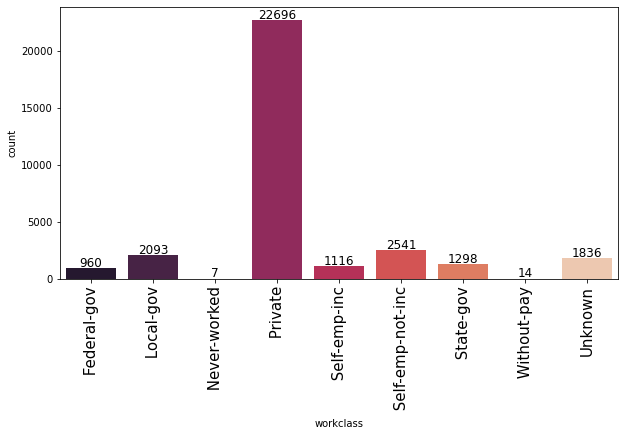

In [25]:
barplt(df,'workclass')

* Most of the people in the given data work in private sector
* Followed by self-emp-not-inc , next local-gov.
* Never worked is the least.

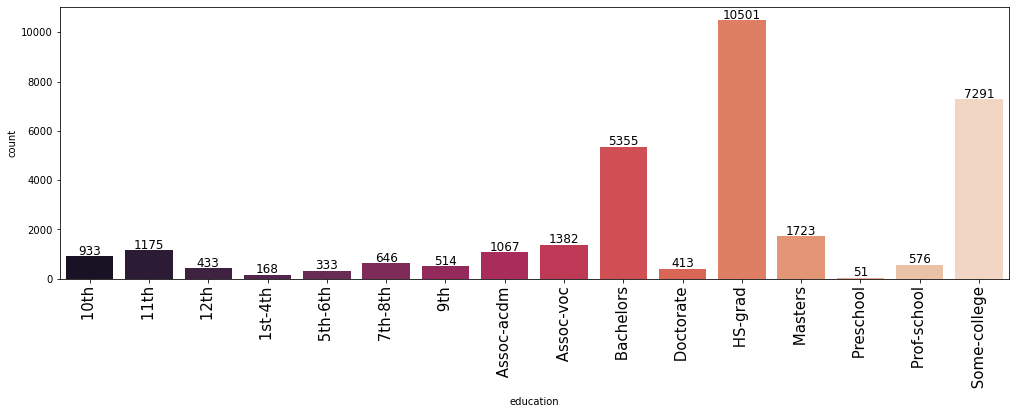

In [26]:
barplt(df,'education')

* The highest education type is HS-grad followed by Some-college and there are around 16 different categories.

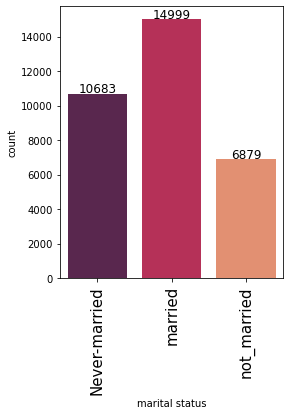

In [27]:
barplt(df,'marital status')

* Married category has most number of people followed by never-married and not_married

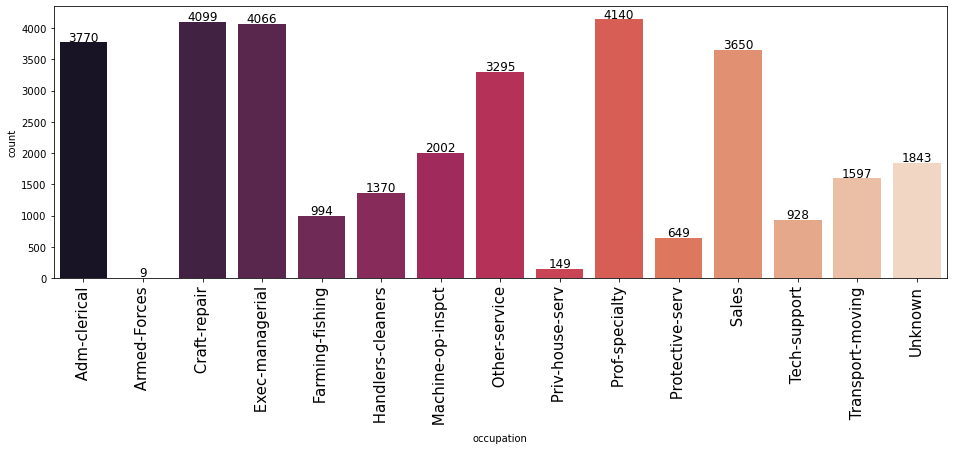

In [28]:
barplt(df,'occupation')

* In occupation prof-specialty is highest followed by Craft-repair.

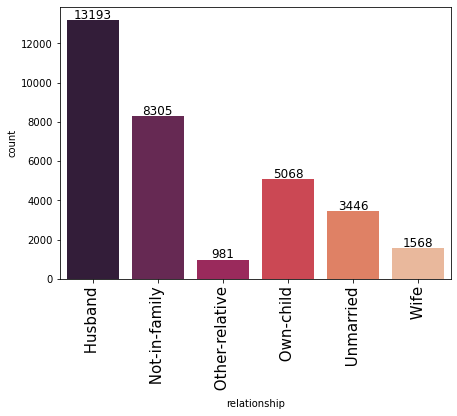

In [29]:
barplt(df,'relationship')

* In relationship husband has the highest frequency and there are 6 different categories.

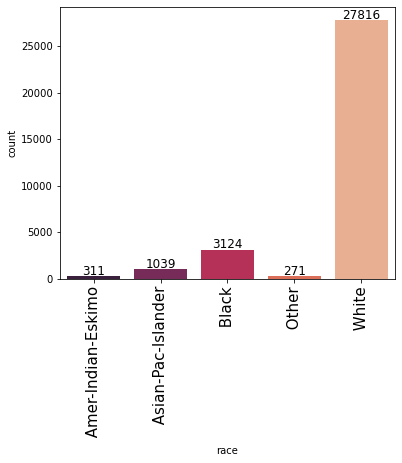

In [30]:
barplt(df,'race')

* There are 5 different race categories with white category being very large compared to others.

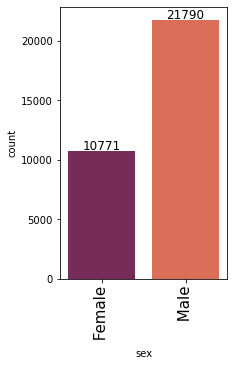

In [31]:
barplt(df,'sex')

* There are two sex types and males being higher than females.

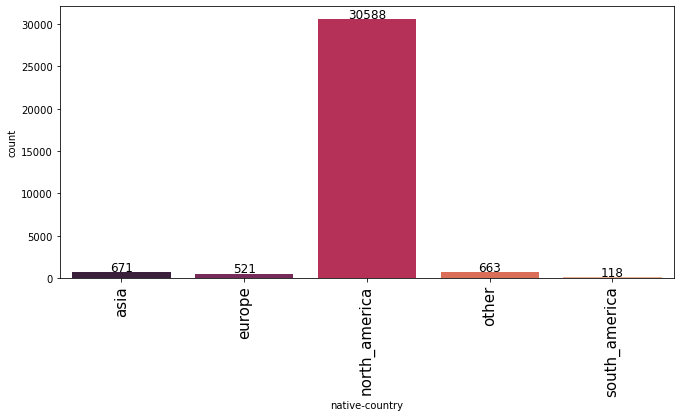

In [32]:
barplt(df,'native-country',n=10)

* North america has the highest number of data 
* South America has the lowest.
* Asia has the second largest data followed by others and europe.

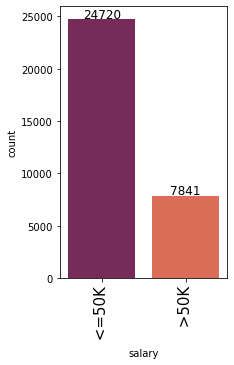

In [33]:
barplt(df,'salary')

* The salary columnn which is the target variable has two categories <=50k and >50k. <=50k has more data points than >50k, so this makes it an imbalanced binary class classification

In [34]:
# Function to plot the boxplot and histogram for a continous varible

def hiplt(data,col,kde=False):
    fig,axs=plt.subplots(nrows=2,ncols=1,sharex=True,gridspec_kw={"height_ratios": (0.25, 0.75)},figsize=(12,7))
    sns.boxplot(data=data,x=col,ax=axs[0],showmeans=True,color='lightcoral')
    sns.histplot(data=data,x=col,stat='density',kde=kde,element='step',ax=axs[1],color='firebrick')
    axs[1].axvline(data[col].mean(),color='green',linestyle='--')
    axs[1].axvline(data[col].median(),color='black',linestyle='-')
    plt.show()

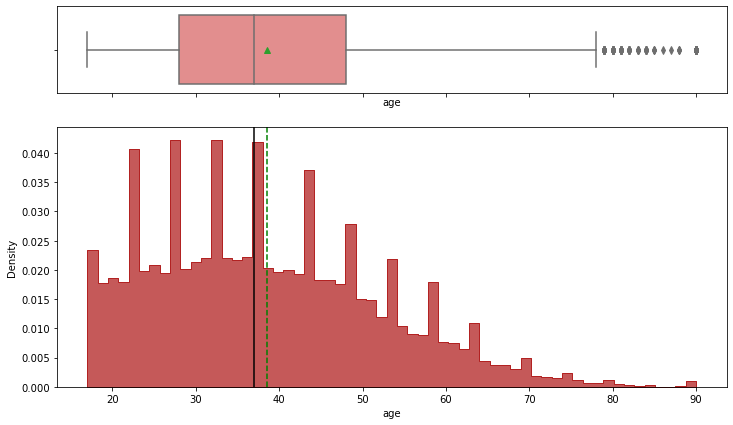

In [35]:
hiplt(df,'age')

* Data has several peaks and is skewed
* There are outliers present and must be treated.

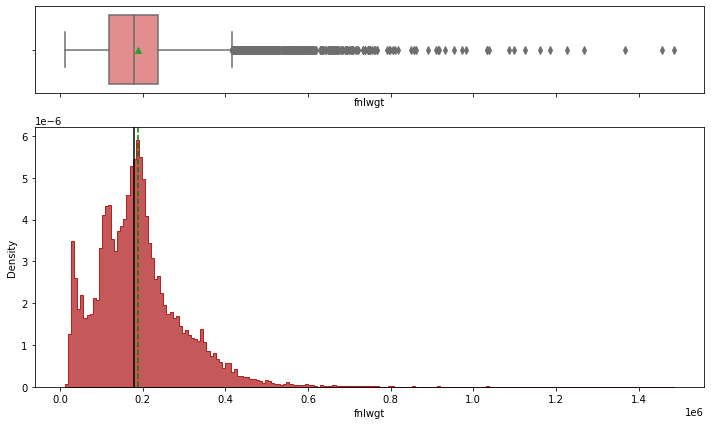

In [36]:
hiplt(df,'fnlwgt')

* The data is skewed
* There are many outliers extending over a large interval after 1.5*Q3
* A closer look on the outliers is necessary for better understanding.

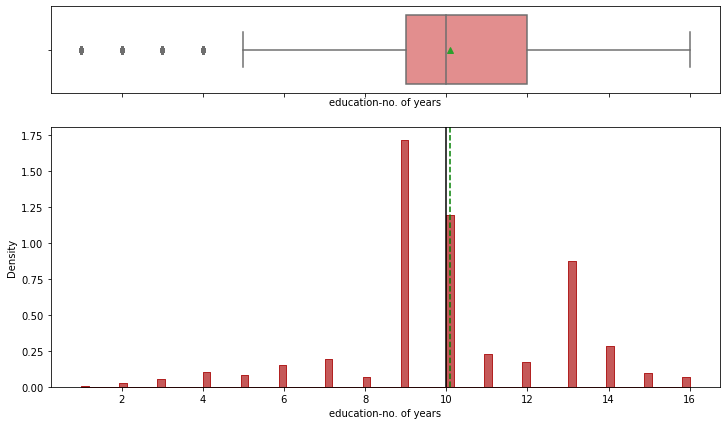

In [37]:
hiplt(df,'education-no. of years')

* The data has outliers on the left hand side of box plot
* The outliers must be treated.

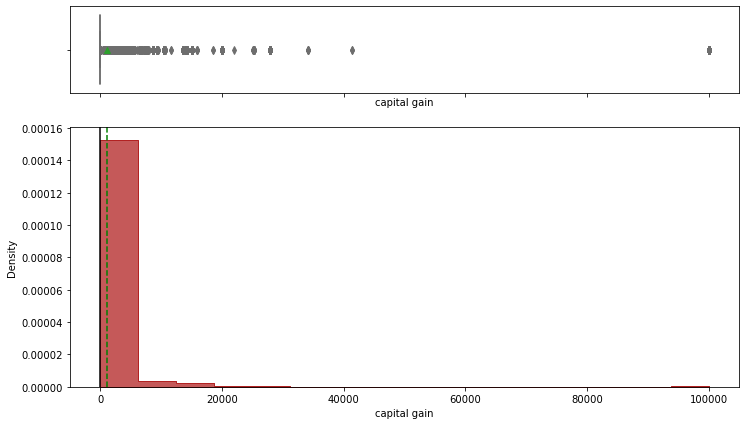

In [38]:
hiplt(df,'capital gain')

* There are many outliers present in the data
* Few outliers are very extreme compared to the remaining data points
* Further analysis is needed to better analyse the capital gain columns and treating of outliers may be required.

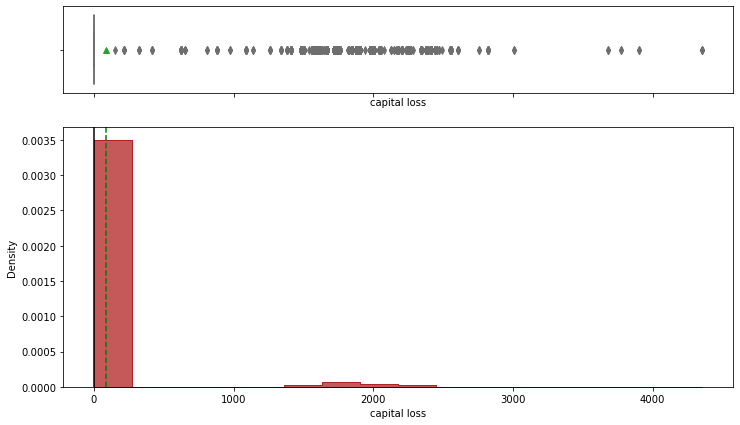

In [39]:
hiplt(df,'capital loss')

* The data has many outliers
* Further analysis on better understanding the outliers is required

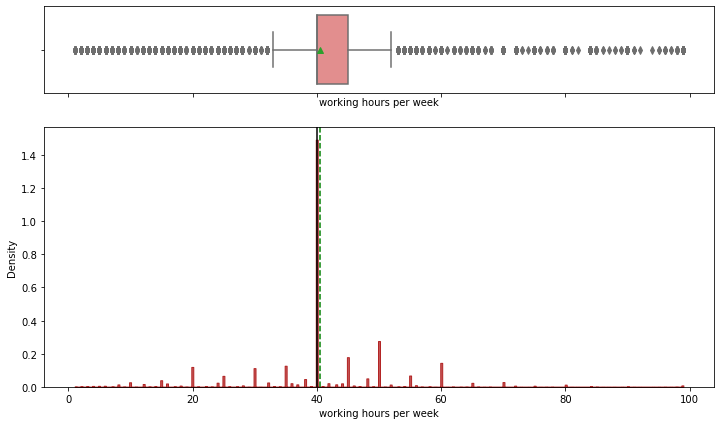

In [40]:
hiplt(df,'working hours per week')

* The data has many outliers on either ends
* Further analysis on understanding and treating the outliers is required.

### Bivariate Analysis

In [41]:
# col=['workclass', 'education','marital status', 'occupation', 'relationship', 'race', 'sex','native-country', 'salary']  
def bxpl(data,cl):
    for i in col:
        l=df[cl].groupby(by=df[i]).median().sort_values().index
        if len(l)>10:
            plt.figure(figsize=(10,10))
        else:
            plt.figure(figsize=(10,7))
        plt.xticks(rotation=45,fontsize=12)
        if len(l)>10:
            sns.boxplot(data=df,y=i,x=cl,showmeans=True,palette='RdBu', order=l[-15:],
                    meanprops={'marker':'o','markerfacecolor':'white','markeredgecolor':'black','markersize':'6'})
        else:
            sns.boxplot(data=df,y=i,x=cl,showmeans=True,palette='RdBu',order=l,
                    meanprops={'marker':'o','markerfacecolor':'white','markeredgecolor':'black','markersize':'6'})
        plt.show()  

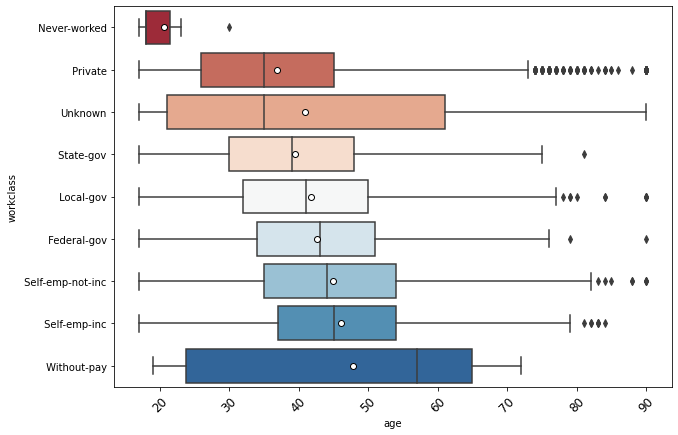

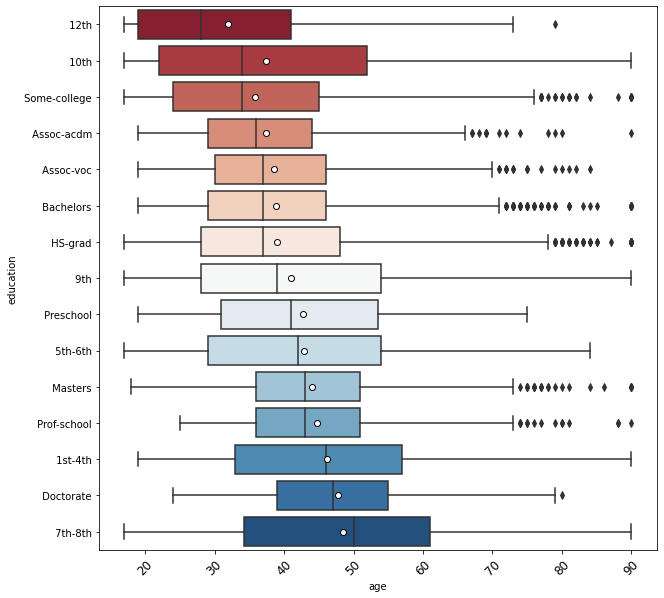

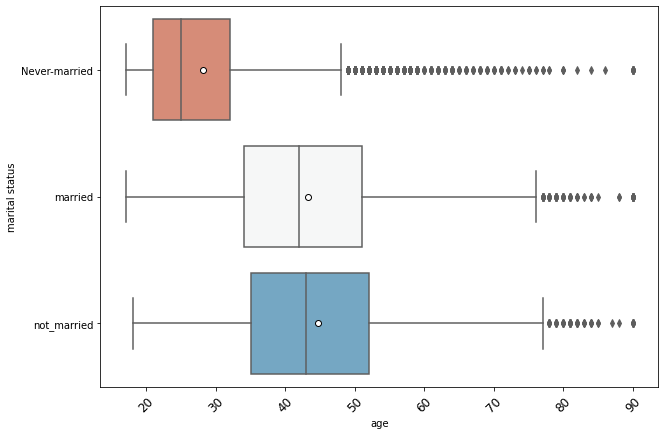

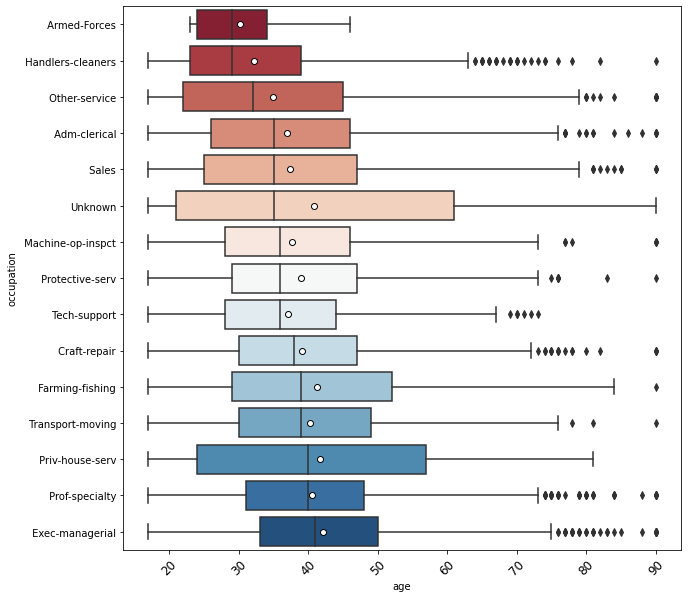

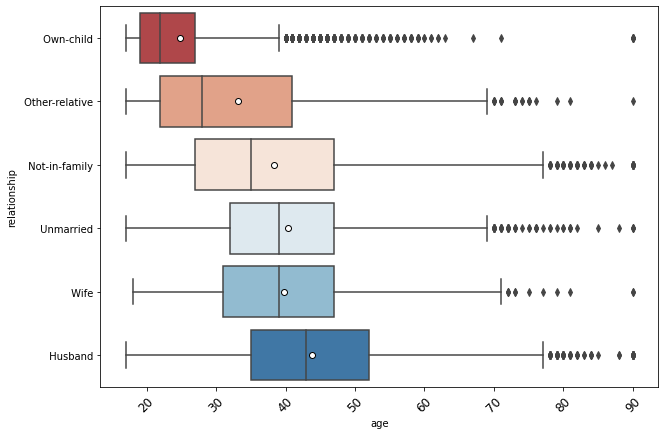

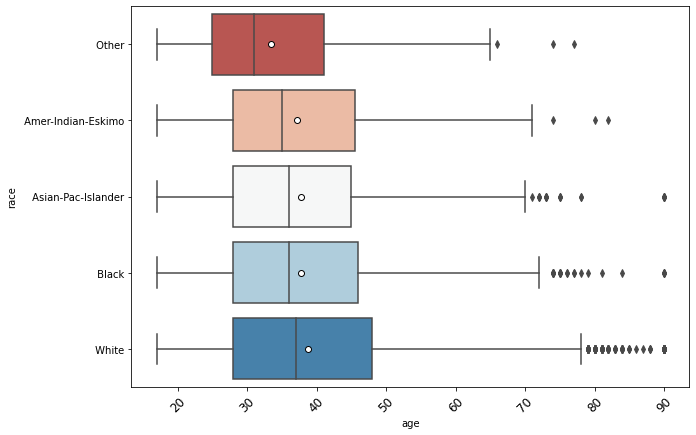

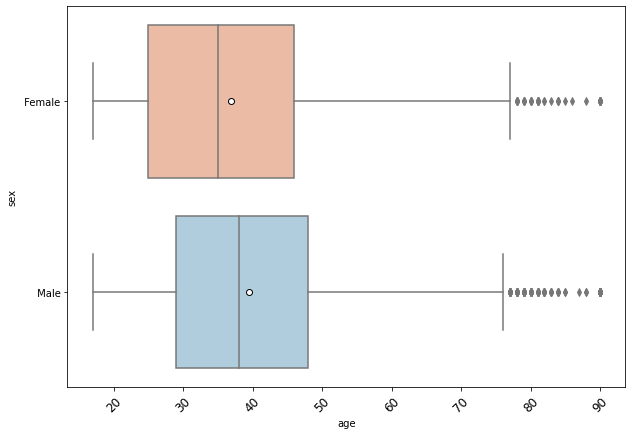

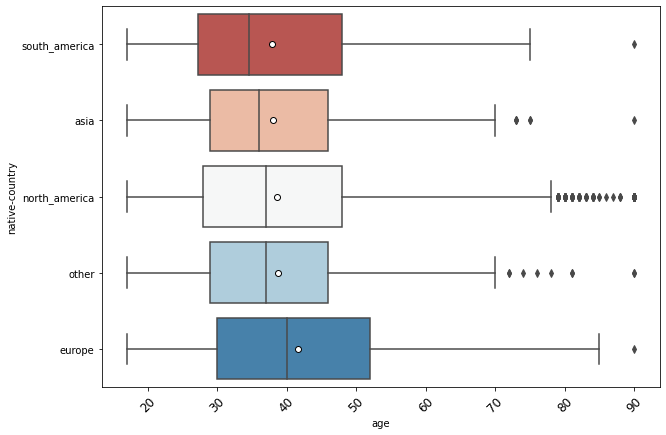

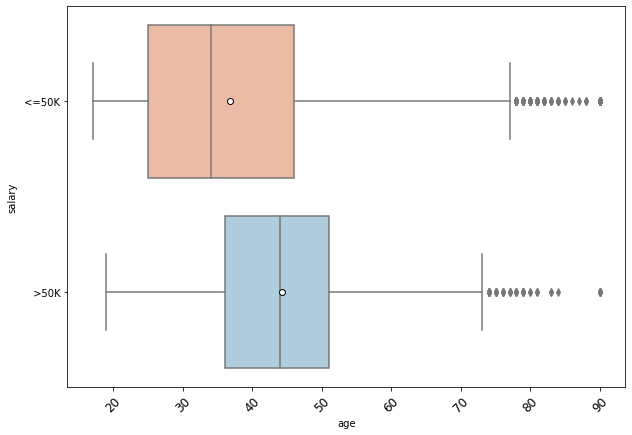

In [42]:
bxpl(df,'age')

* The median age of workclass is highest for without-pay and lowest is for private. Remaining categories have a median age between 37-44.
* The median age is highest for education 7th-8th and 11th has the least. All the remaining types have median age betwenn 35-40.
* Not married has the hoghest median age followed by married and never married.
* The lowest median age is for Handlers-cleaners & Armed-Forces occupation and the highest is for Priv-house-service & Exec-managerial. For remaining types of occupation the median age is between 32-38 years.
* The highest median age is for husband relationship and the lowest is for Own-child. Remaining types have medain age between 30-39 years.
* The median age of all the races are almost similar about 36, except for the other race type which is about 30 years.
* Males have higher median age compared to females
* Europe has the highest median age and south amreica has the lowest.
* The median age of salary >50k is higher than that of <=50k.
* Most of the categories have outliers.

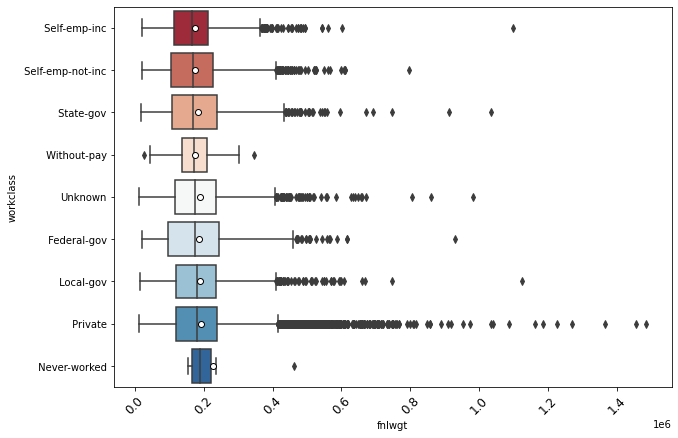

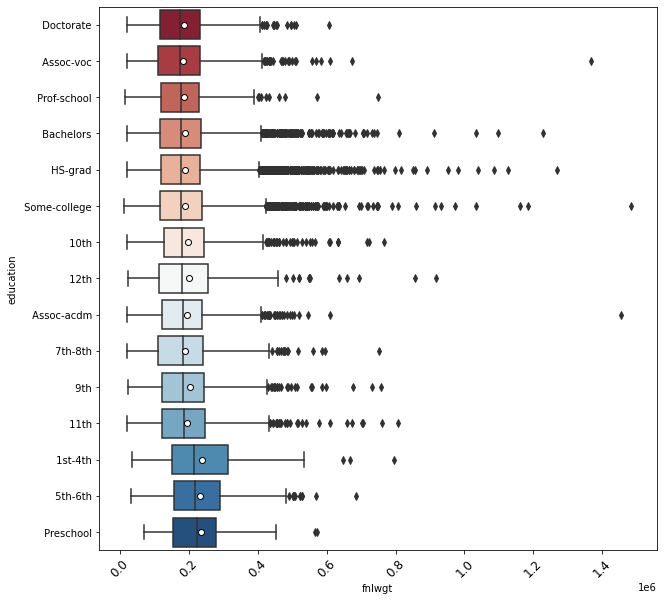

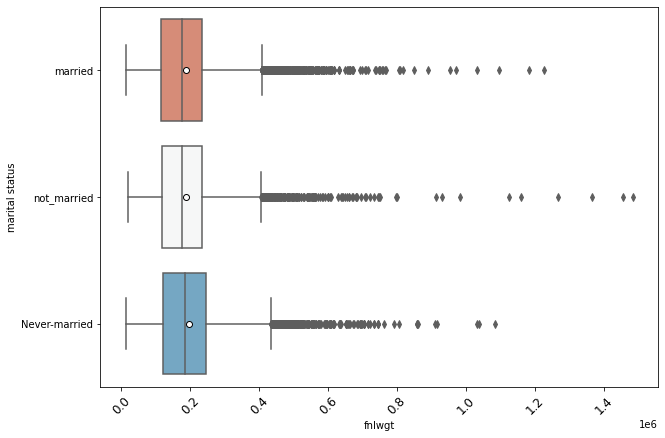

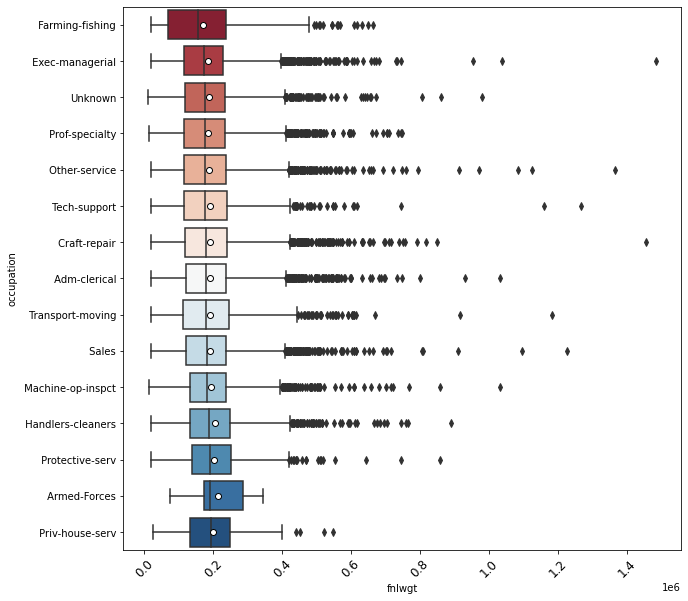

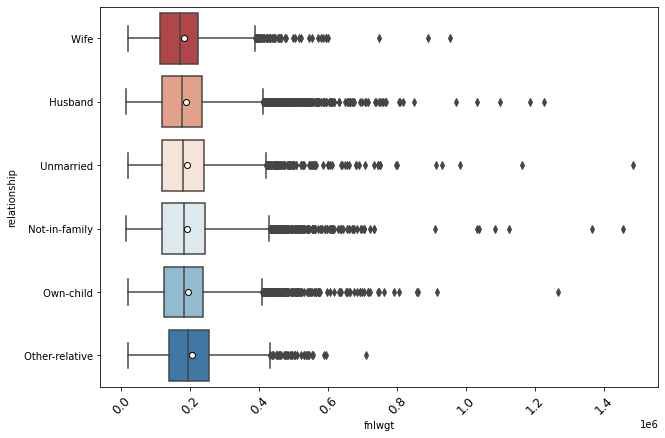

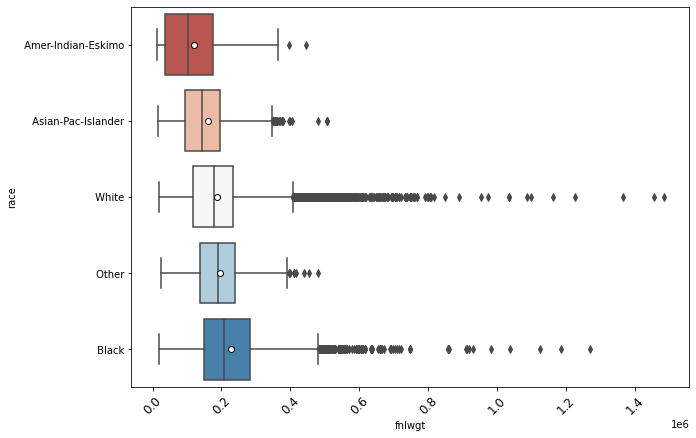

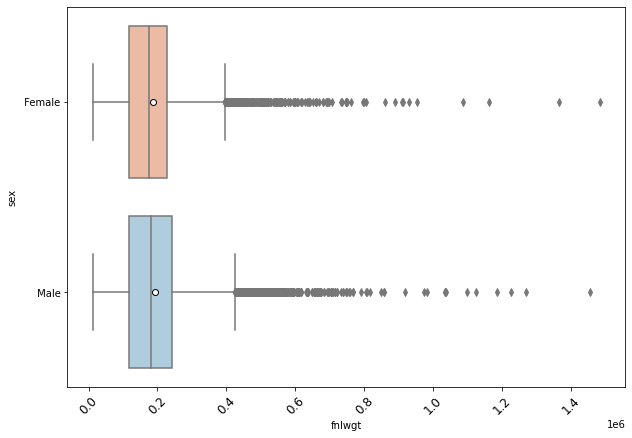

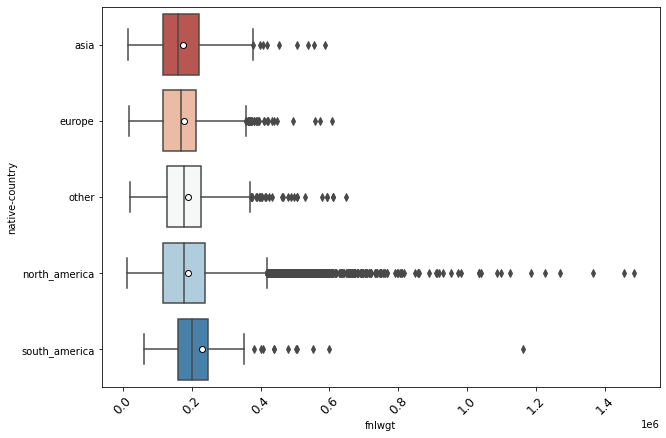

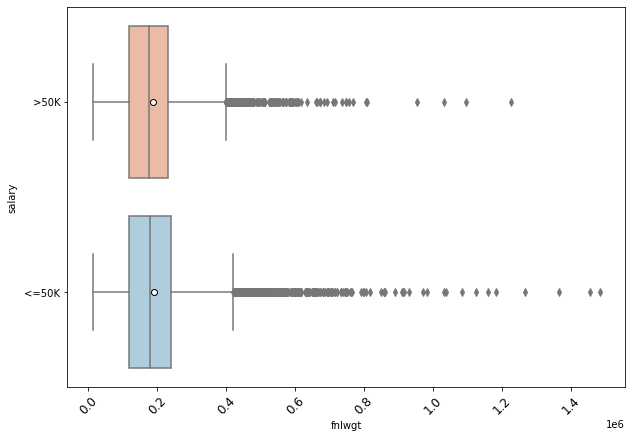

In [43]:
bxpl(df,'fnlwgt')

* Private workclass has the highest fnlwgt. 
* Some-college has the maximum fnlwgt value followed by Assoc-acdm. Preschool has the highest median fnlwgt.
* The highest fnlwgt is shared by divorced and seperated marital classes
* Exec-managerial occupation has the max value of fnlwgt value followed by craft-repair. The lowest median is for Farming-Fishing ad highest is for Priv-house-serv.
* Never married has the highest median whereas not_married has the max value of fnlwgt.
* The median fnlwgt is lowest for Amer-Indian-Eskimo and highest for black. But the maximum fnlwgt is for white race.
* Male and Females have a similar distribution of fnlwgt
* south_america has the highest median fnlwgt followed by north_america.
* Both type of salary have approximately equal median. But <=50k has the max value of fnlwgt.

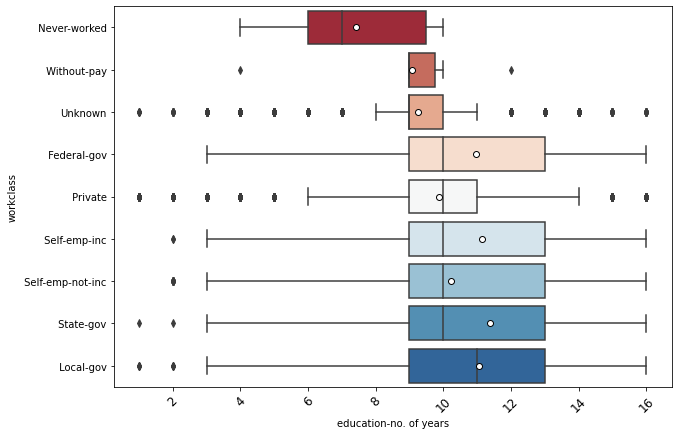

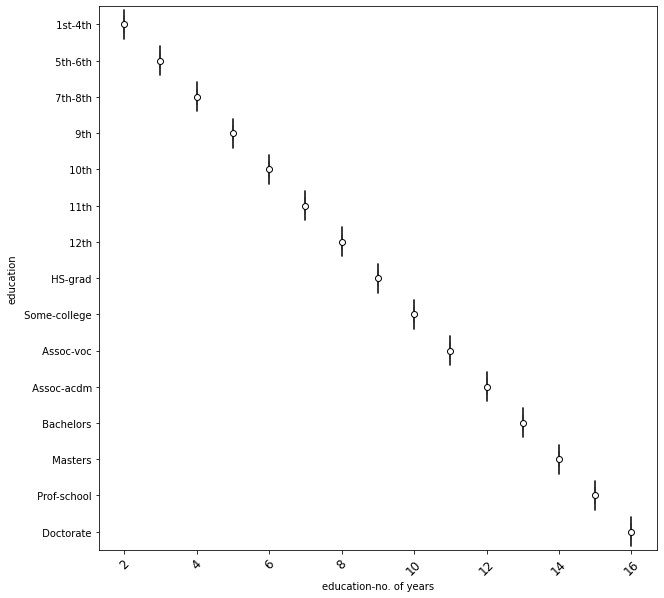

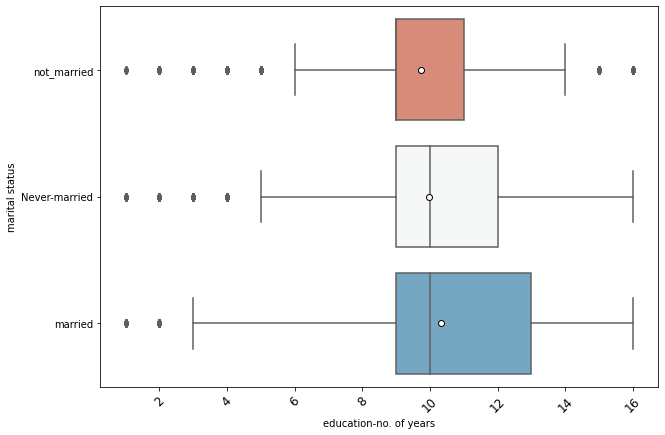

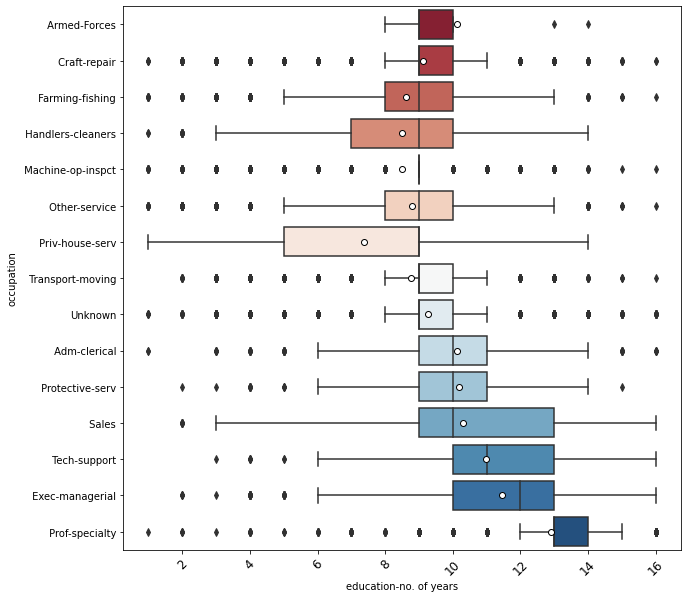

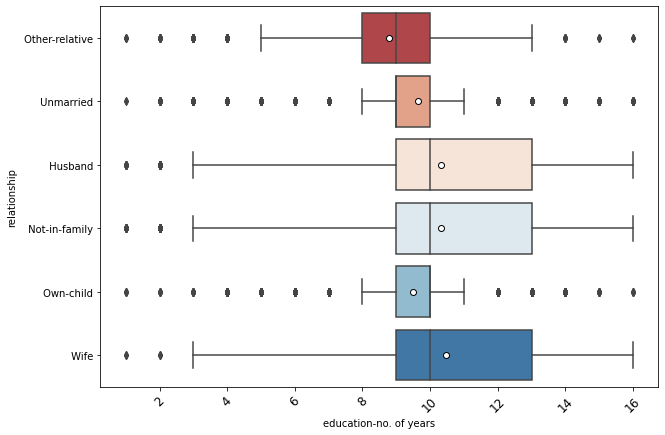

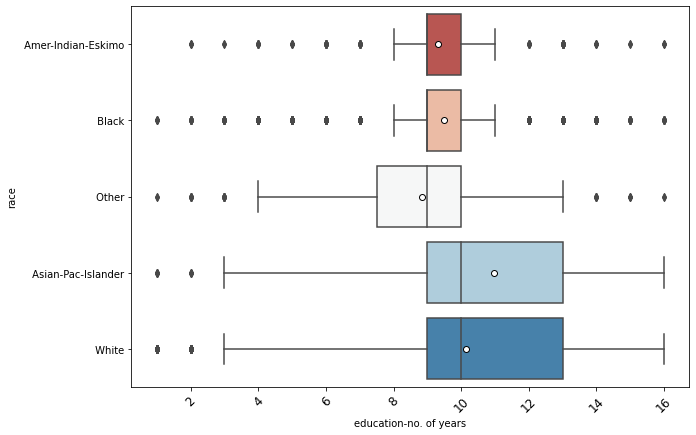

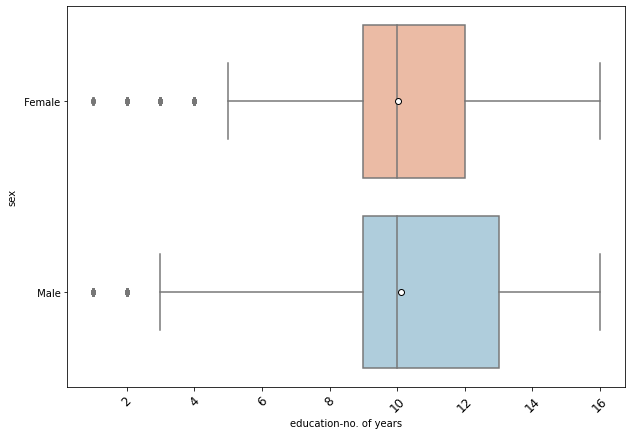

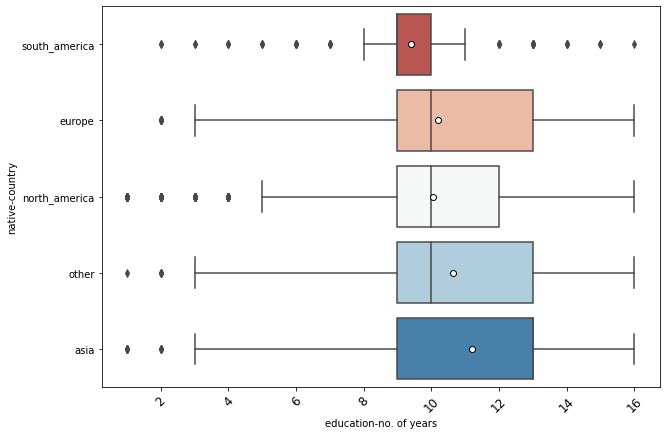

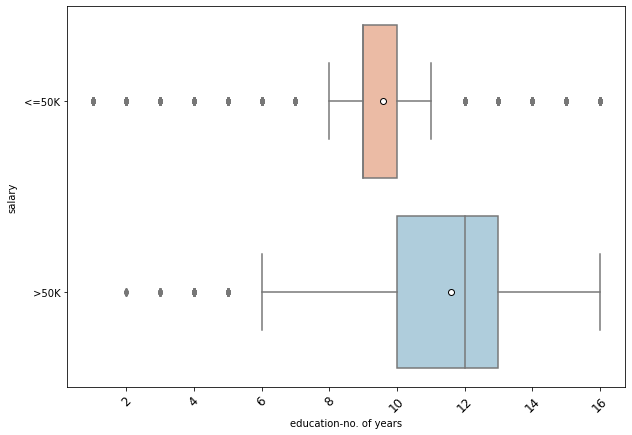

In [44]:
bxpl(df,'education-no. of years')

* The median no of education years is lowest for without pay workcalss. For all the remaning workclass it is almost same.
* The no of years of education is highest for Doctorate and lowest for 1st-4th. The number of years of education increases as the standard increases.
* Married has the highest median education years followed by Never-married.
* Prof-specality has the highest median education years and lowest is for Armed forces and Craft-repair.
* Most relationship type has the median education years as 10, with Other-relative and Unmarried being 9.
* Asian-Pac_Islander has the highest median education years, with Amer-Indian-Eskimo & Black being lowest.
* The median years of education for males and females is similar but the differece between median and Q3 is higher for males.
* Asia has the highest median education years followed by other. 
* The median education years is higher for >50k salary compared to <=50k salary.
* There are outliers present in the data for most of the categories.

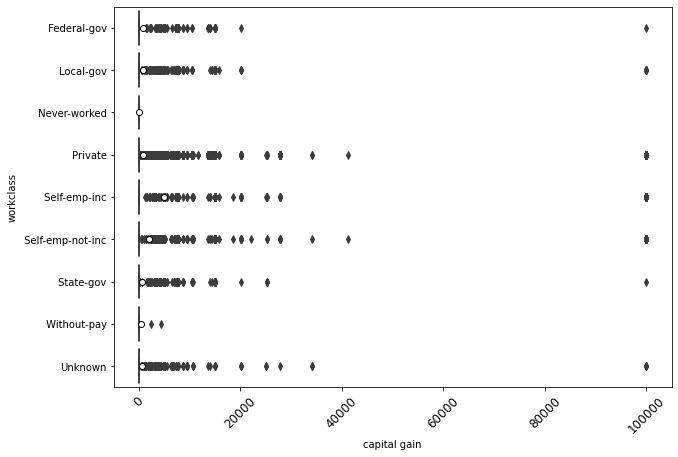

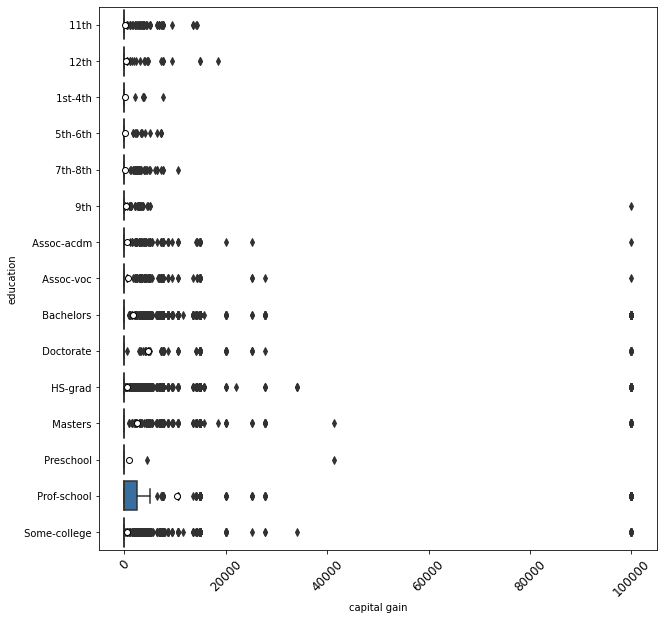

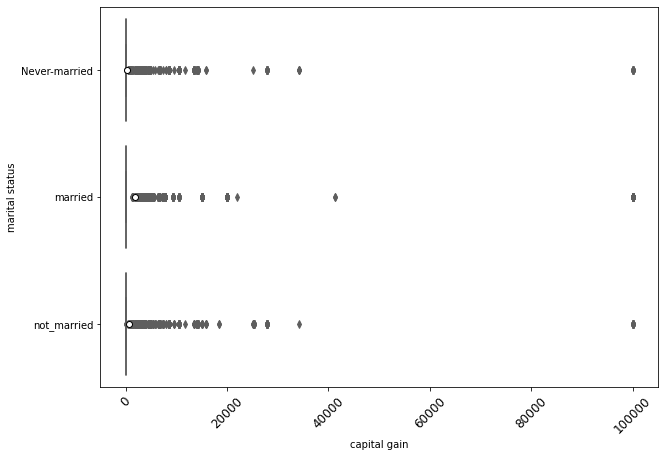

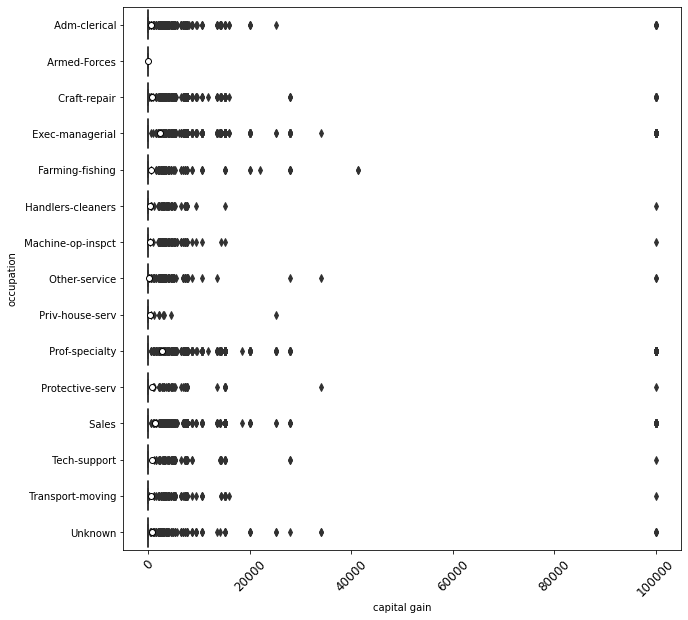

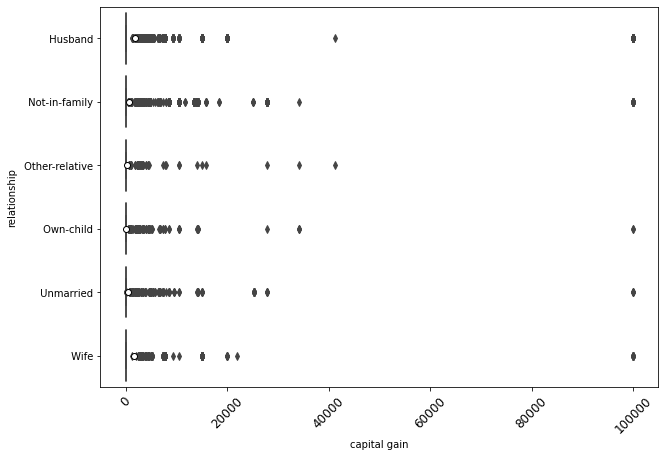

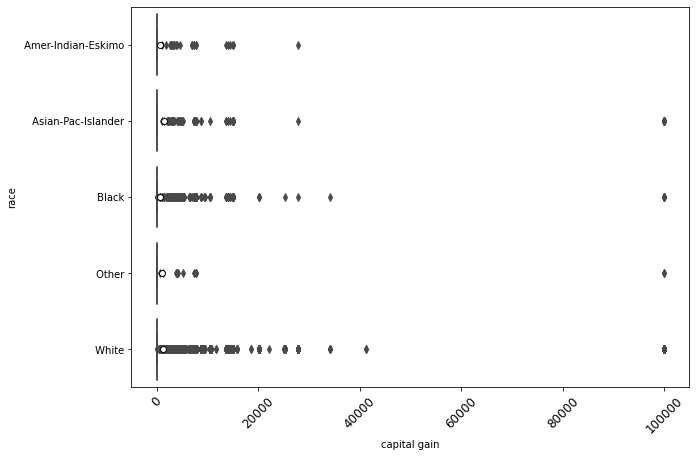

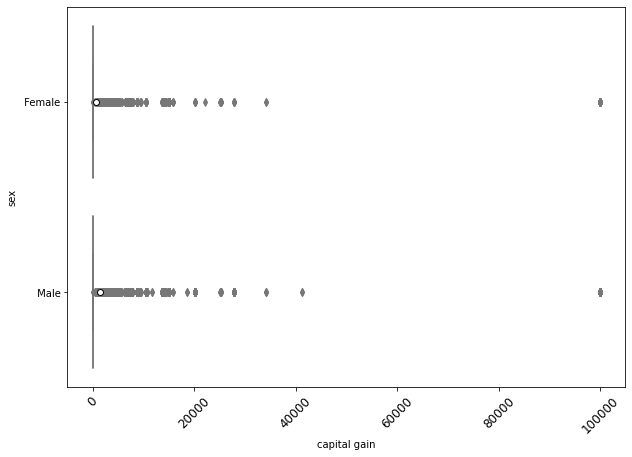

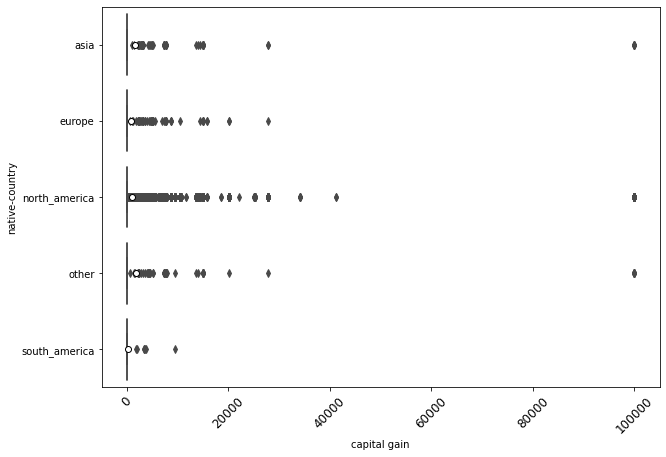

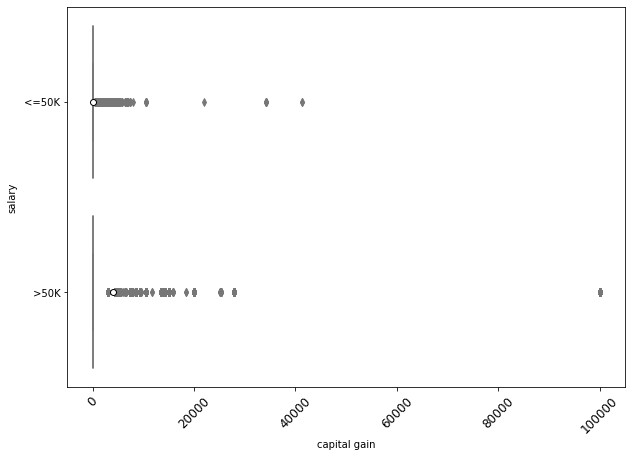

In [45]:
bxpl(df,'capital gain')

* The median capital gains for most of the categories is almost close to 0.
* Almost all the categories have outliers and the maximum value being 100000 
* The cpaital gain for >50k salary has the maximum value 100000. Also the mean capital gain for >50k is higher than <=50k.
* For most categories about 75% of the data is at 0.

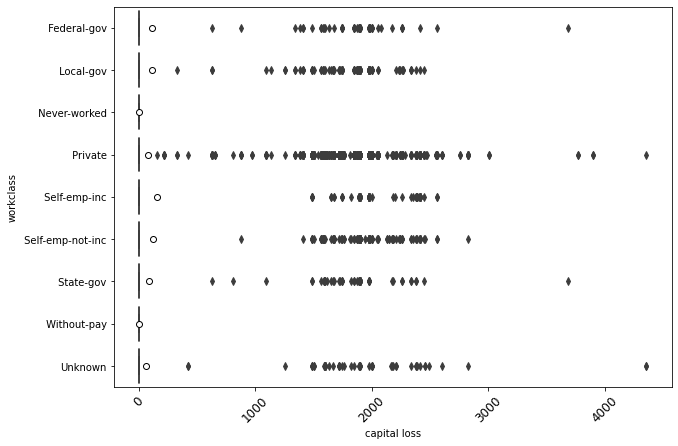

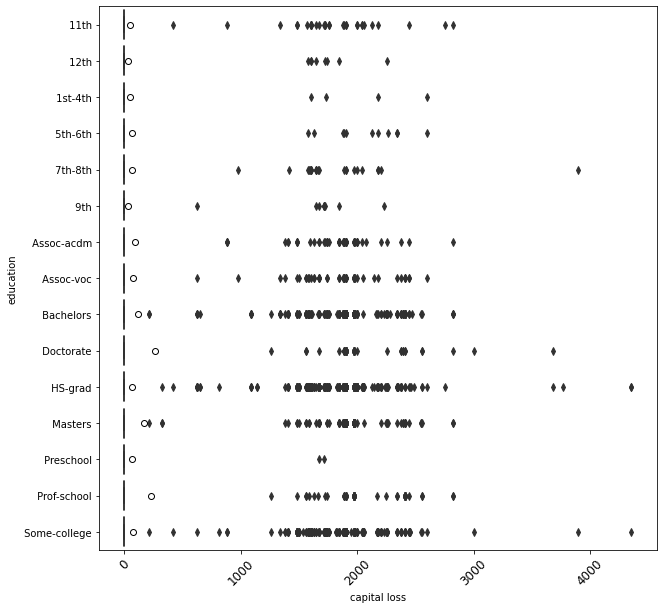

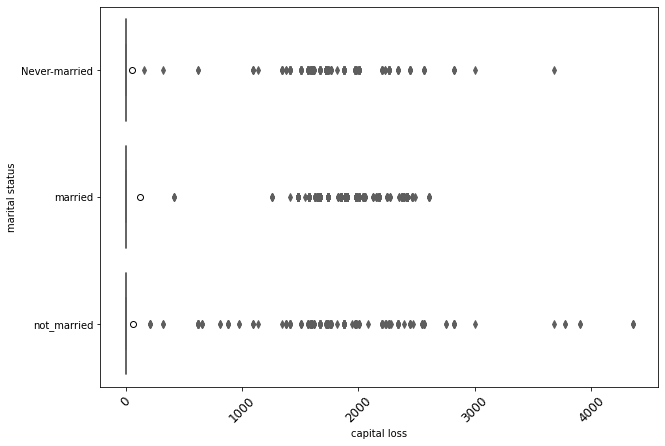

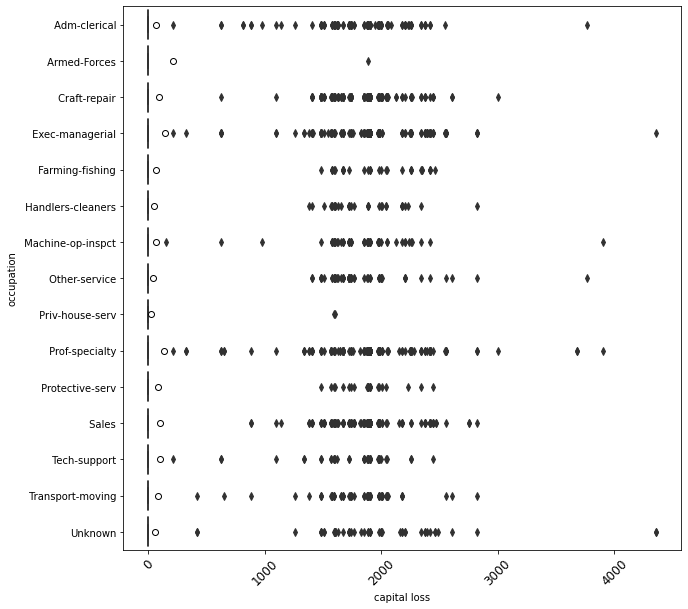

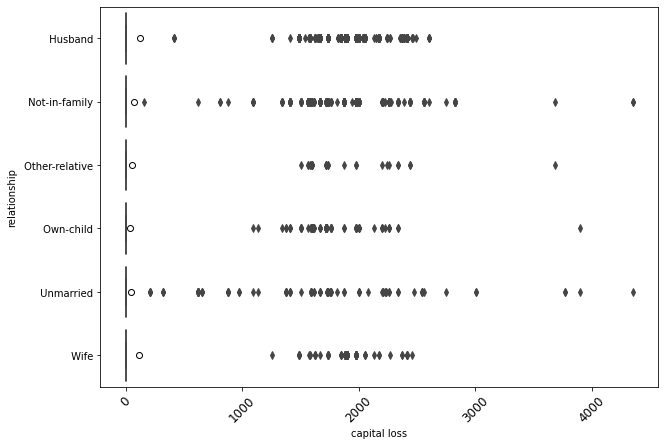

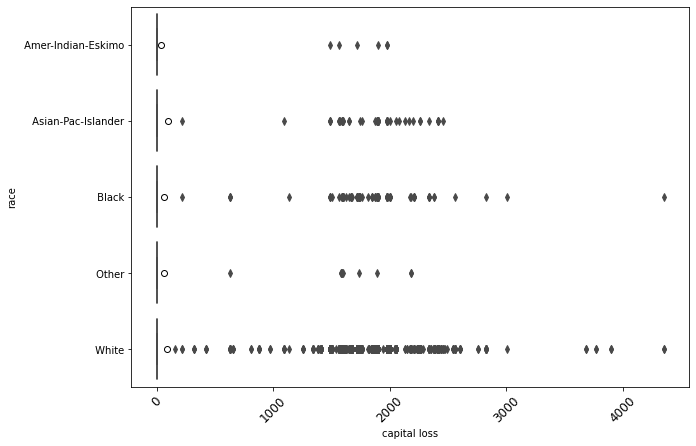

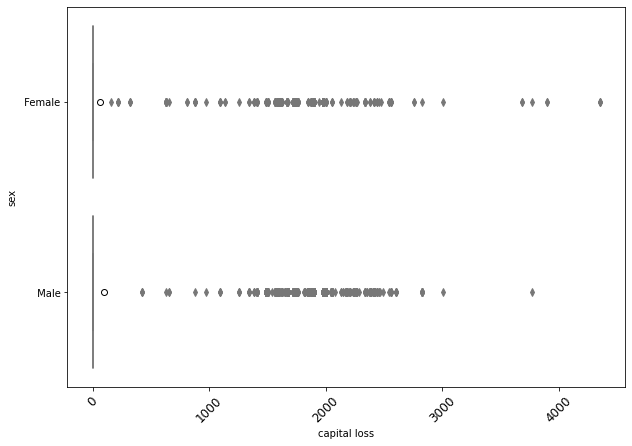

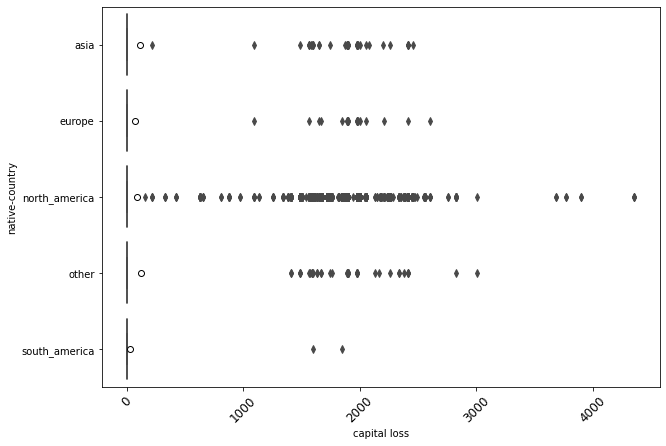

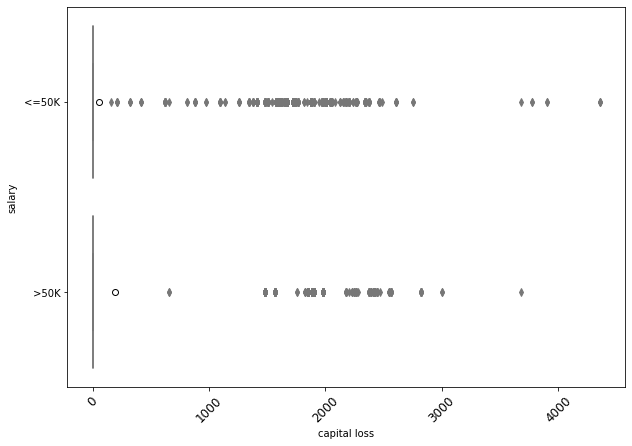

In [46]:
bxpl(df,'capital loss')

* Most categories have the median value at 0.
* 0 is the least capital loss and the max loss is >4000.
* <=50k salary has the maximum loss value i.e. >4000, while >50k has the maximum loss <4000.
* The mean loss for >50k is higher compared to <=50k.
* For most categories about 75% of the data is at value 0.

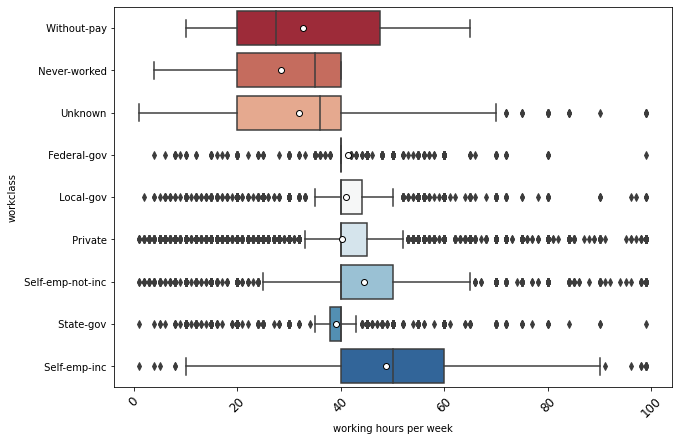

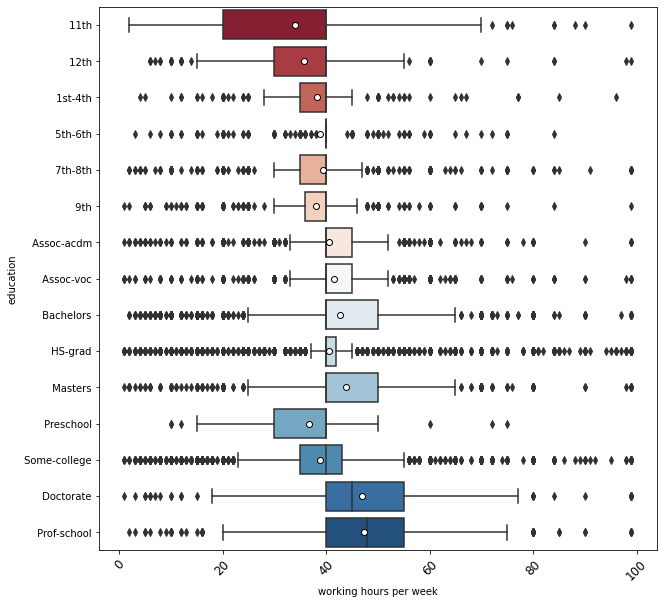

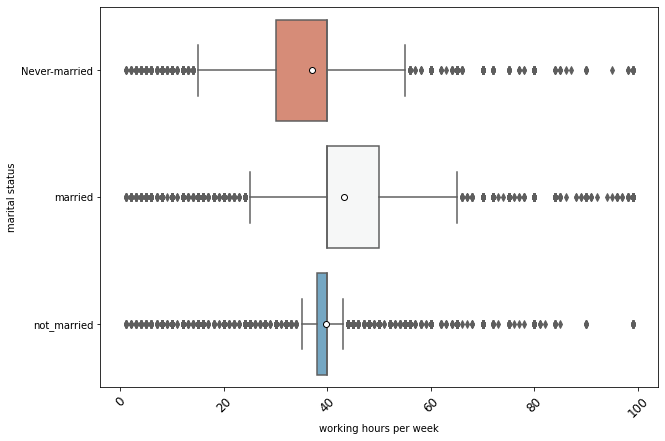

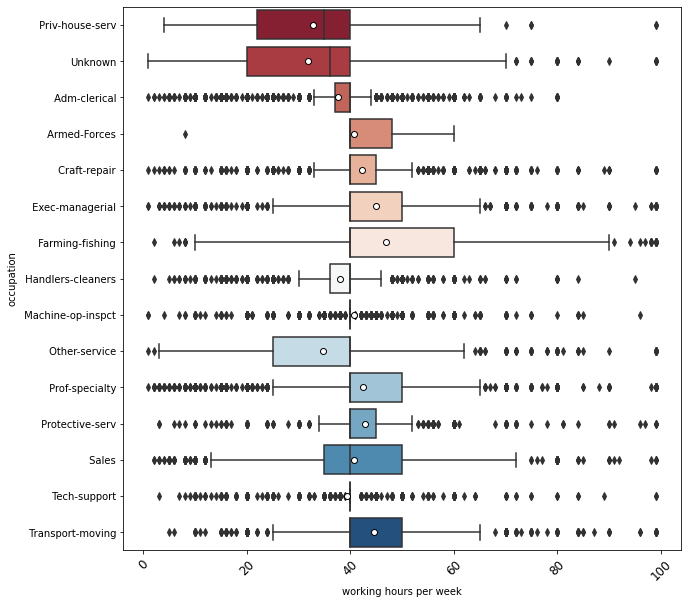

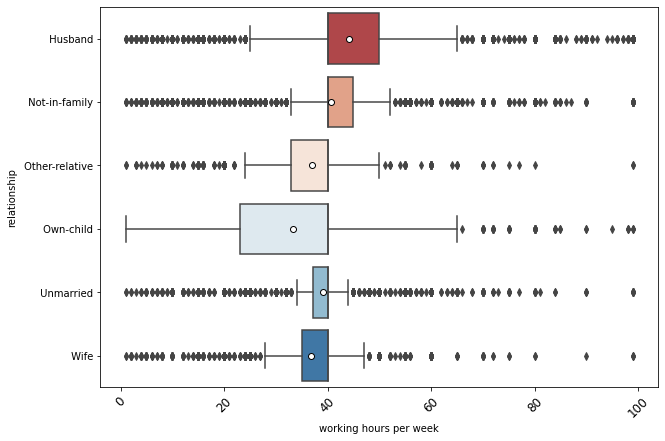

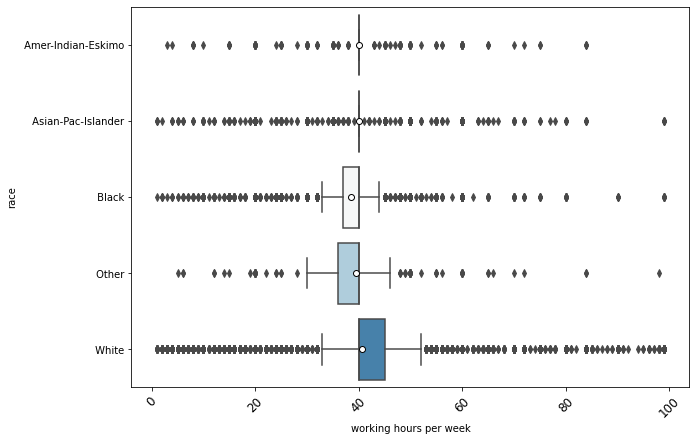

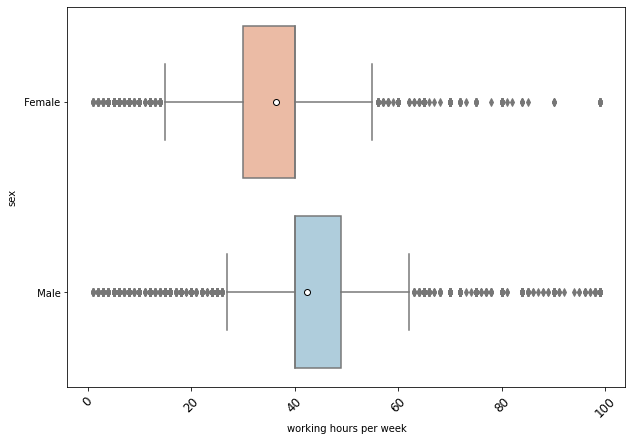

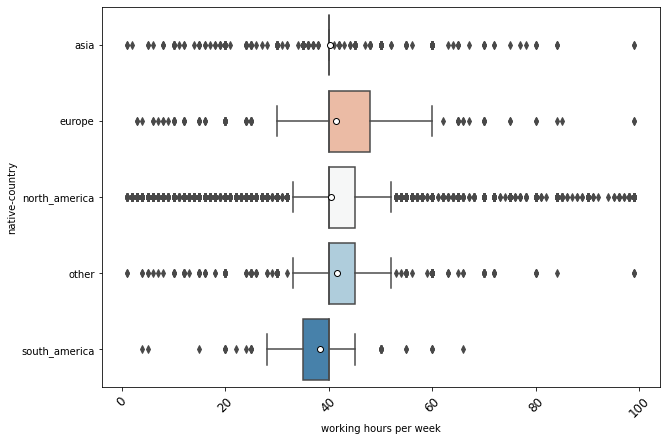

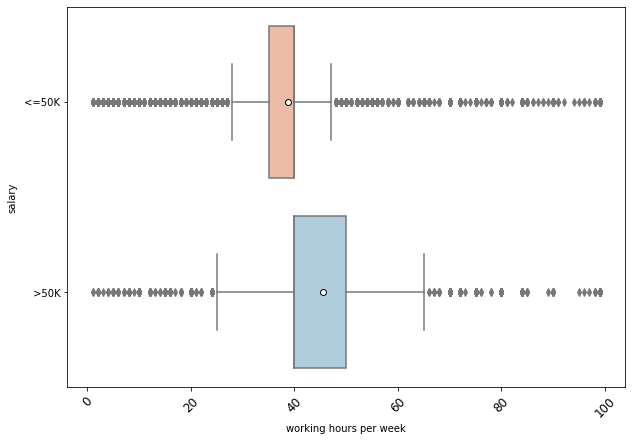

In [47]:
bxpl(df,'working hours per week')

* The median working hours for Self-emp-inc is the highest and the lowest being Without pay. Remaining type of workclass have approximately same median at 40 hrs.
* The median working hours is highest for Pro-school education type. 
* All types of marital status has the same median working hours per week.
* Except Priv-house-serv and Adm-clerical all others have the same median workig hours. Priv-house-serv has the least median working hours.
* All types of relationships has the same type median working hours.
* All races have the same median working hours per week
* The median working hours are same for both male and female. As Q2 is equal to Q3 for females we can say that males are more spread out in between Q2 and Q3.
* All countries have same median working hours per week.
* The median working hours is same for both salaries. The Q1 & Q2 values are same for salary >50k and Q2 & Q3 values are same for salary <=50k.

In [48]:
# col=['workclass', 'education','marital status', 'occupation', 'relationship', 'race', 'sex','native-country', 'salary']  
def boxplt_hue(data,cl):
    for i in col:
        if i!= 'salary':
            l=df[cl].groupby(by=df[i]).median().sort_values().index
            if len(l)>10:
                plt.figure(figsize=(18,7))
            else:
                plt.figure(figsize=(15,5))
            plt.xticks(rotation=45,fontsize=12)
            if len(l)>10:
                sns.boxplot(data=df,x=i,y=cl,showmeans=True,palette='Set3', order=l[-15:], hue='salary',
                        meanprops={'marker':'o','markerfacecolor':'white','markeredgecolor':'black','markersize':'6'})
            else:
                sns.boxplot(data=df,x=i,y=cl,showmeans=True,palette='Set3',order=l, hue='salary',
                        meanprops={'marker':'o','markerfacecolor':'white','markeredgecolor':'black','markersize':'6'})
            plt.show()

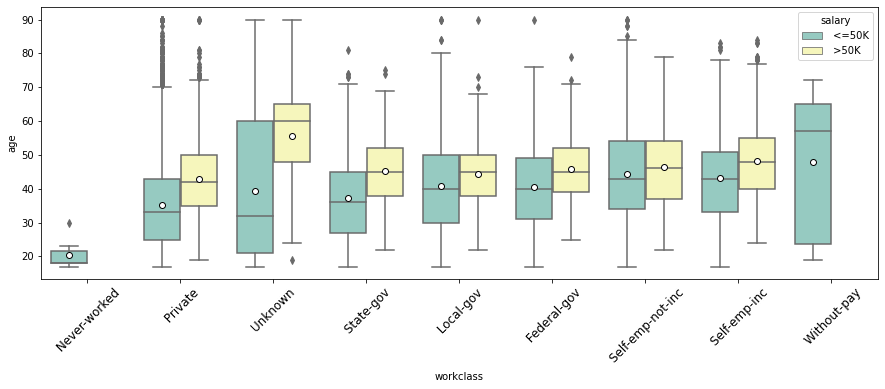

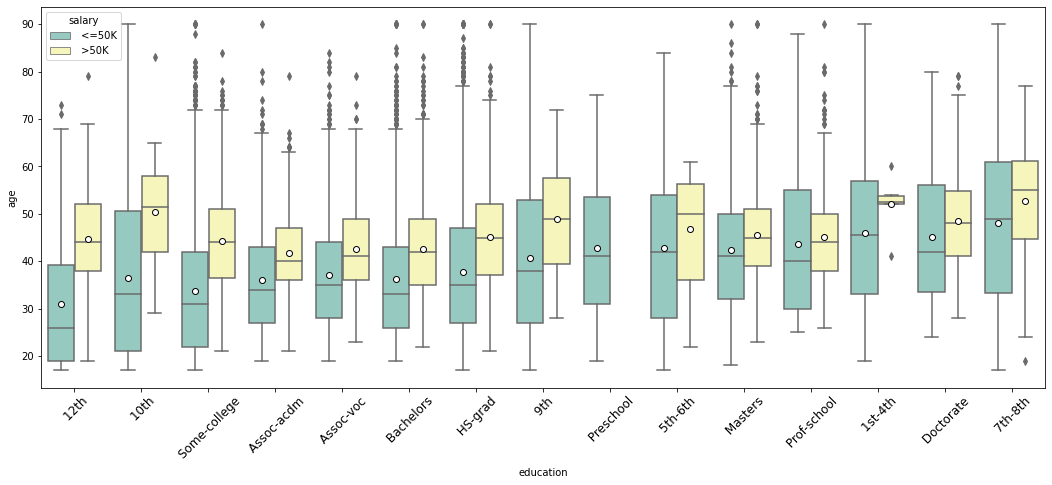

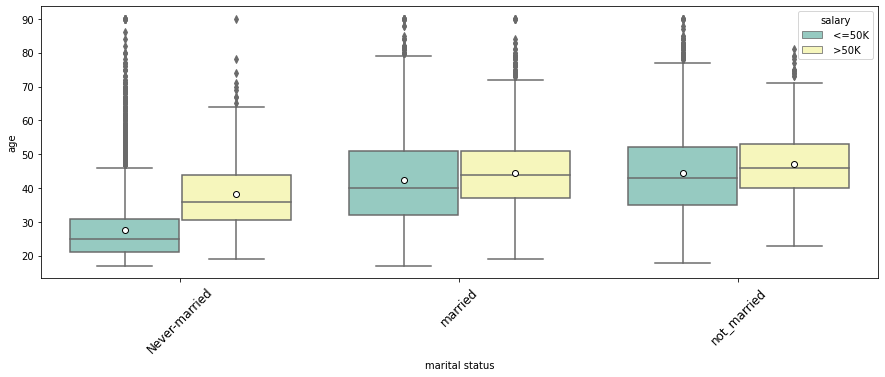

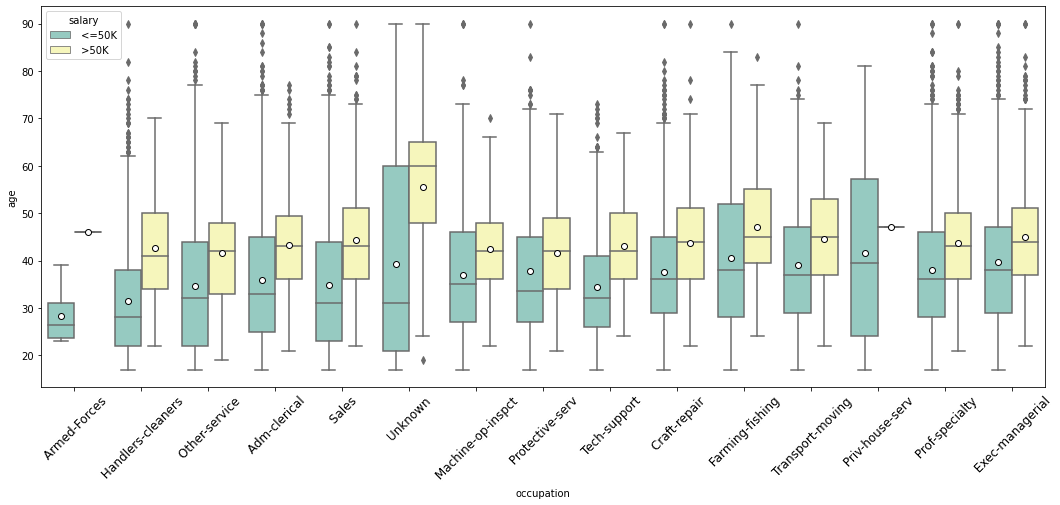

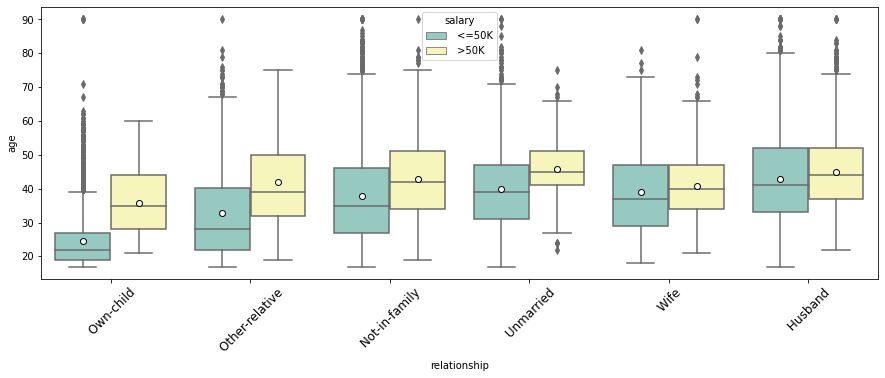

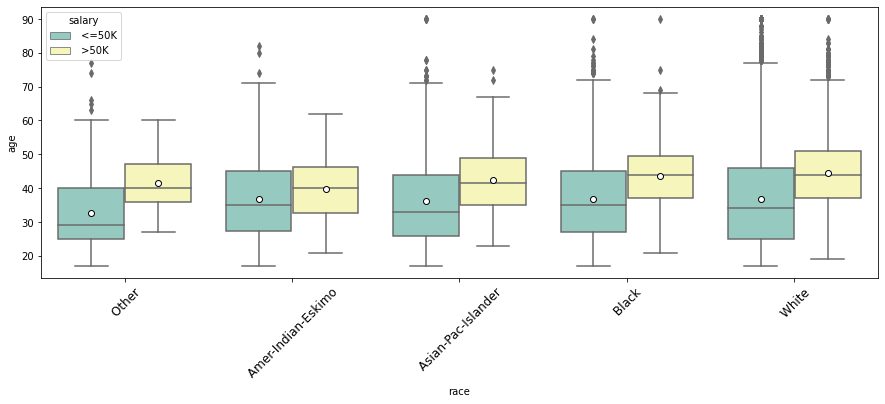

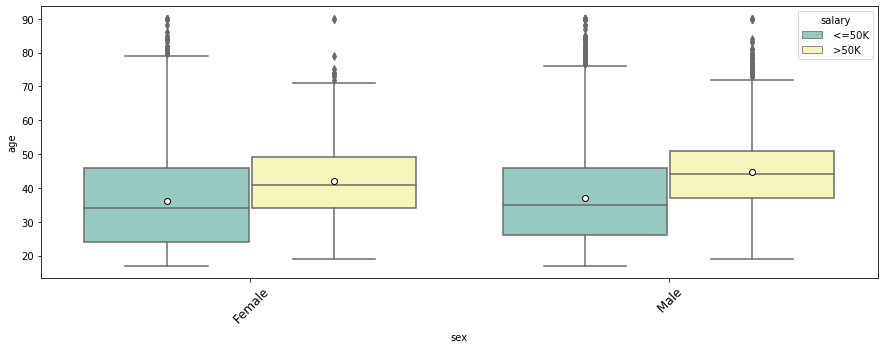

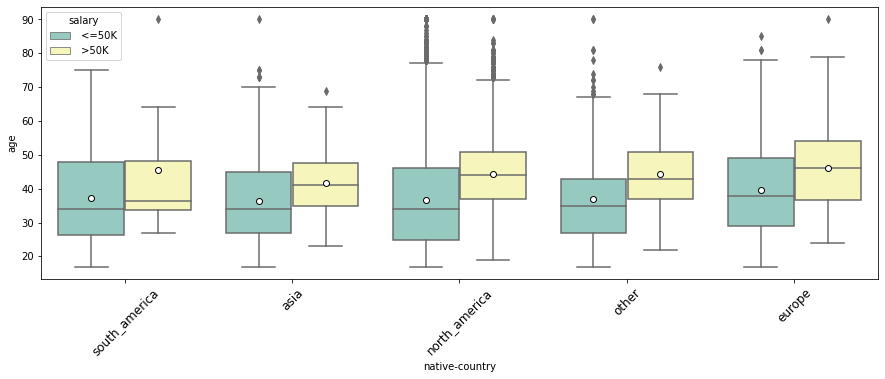

In [49]:
boxplt_hue(df,'age')

* The median age of the salary >50k is higher compare to <=50k for all workclass except for without-pay type as it does not have any data for salary >50k.
* The median age of all classes of education is higher for salary >50k compared to <50k except for Preschool as it does not have any data for >50k salary.
* Married-AF-spouse and widowed have same medians for both salary >50k and <=50k. For remaining all >50k has higher median age.
* The median age is higher for all occupations, relationship, race and sex with slary >50k compared to <=50k.
* In most of the countries shown the median age is higher for salary >50k compared to <=50k.

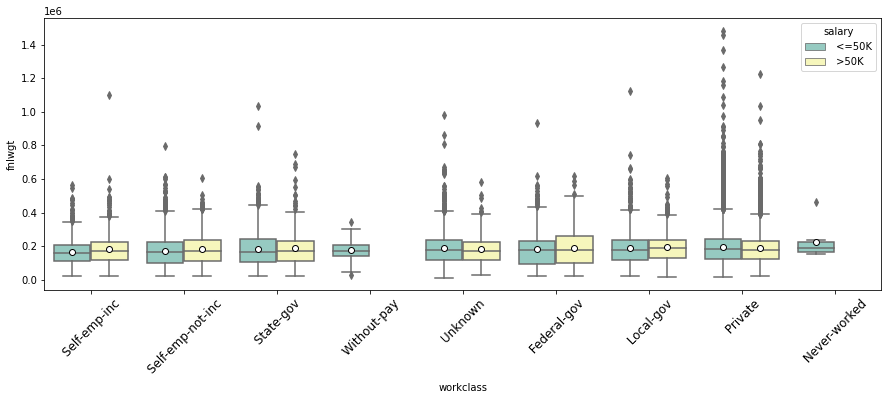

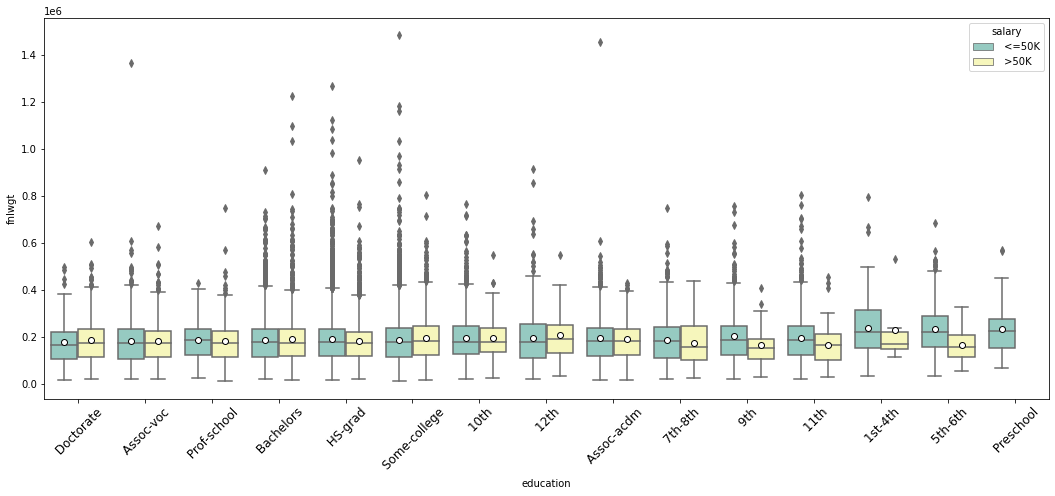

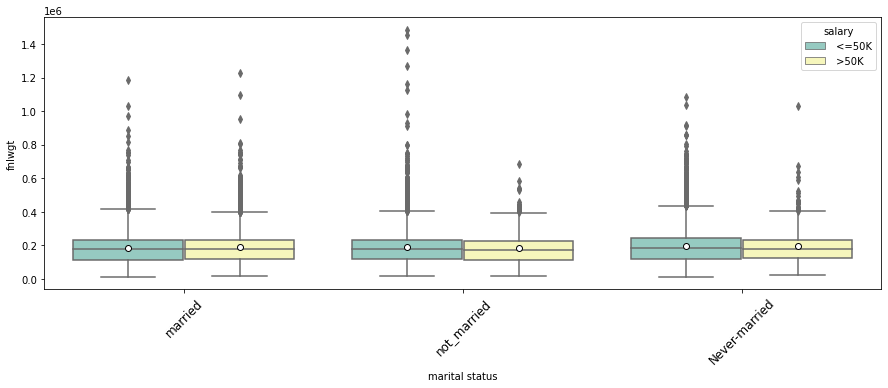

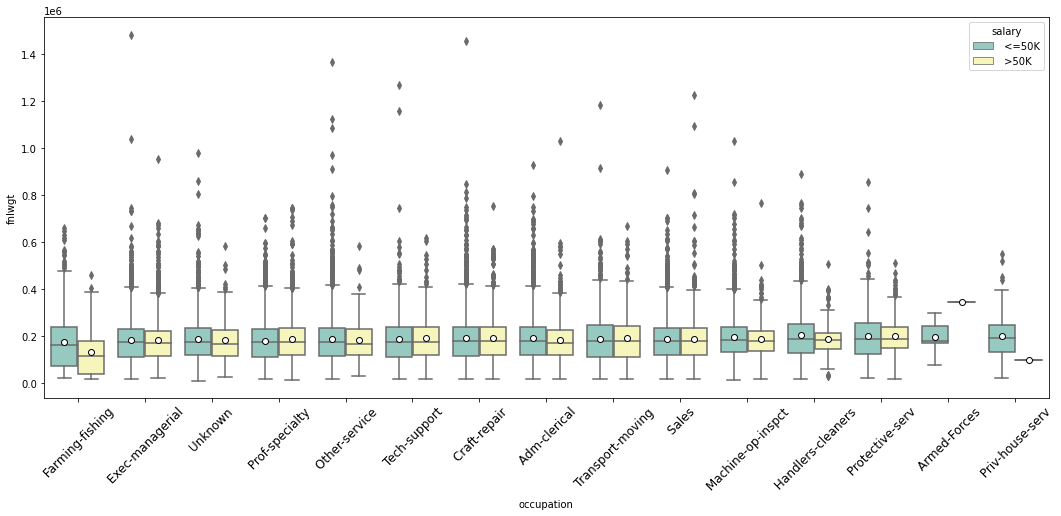

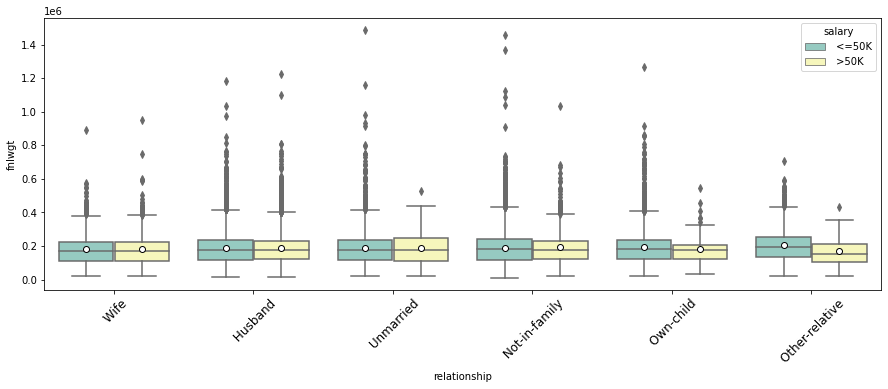

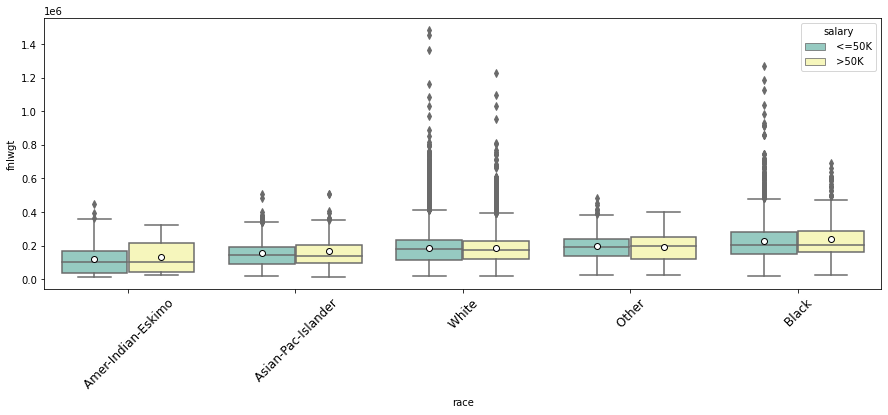

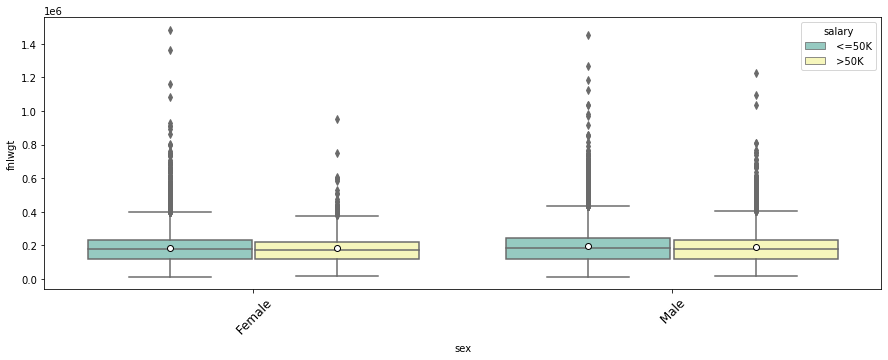

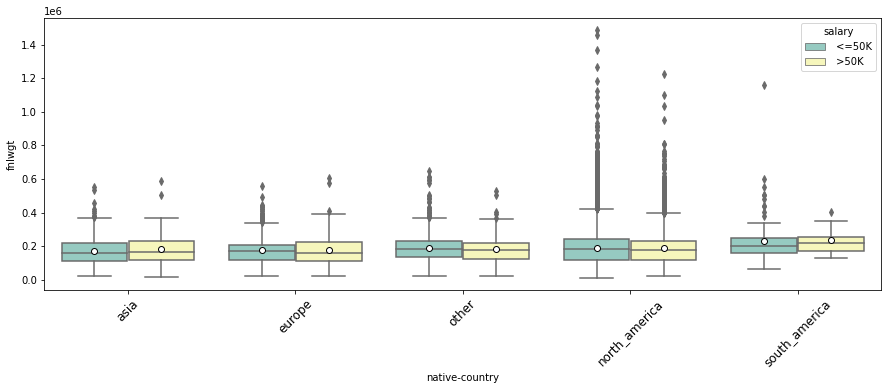

In [50]:
boxplt_hue(df,'fnlwgt')

* The median fnlwgt is almost same for both salaries for all workclasses except without-pay.
* The median fnlwgt is less for >50k compared to <=50k for education 7-8,11th,9th,5-6th,1-4th and remaining types have almost same median.
* The median is higher for Married-AF-spouse and lesser for Married-spouse-absent, remaining relationships have the same median.
* The median fnlwgt is higher for Armed-Forces, less for Fmarming-Fishing& Priv-house-serv and remaining all types have equal medians for both type of salaries.
* The median fnlwgt is same for all relationships, races and sex for both slaries.
* The median flnwgt is higher for few countries and lower for few countries based on salaries.

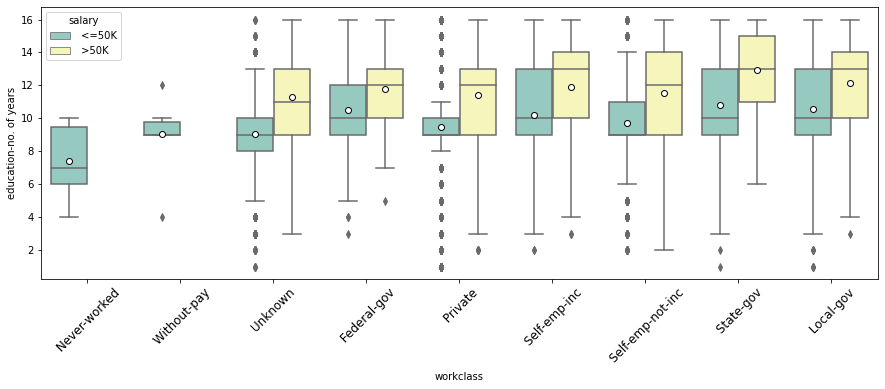

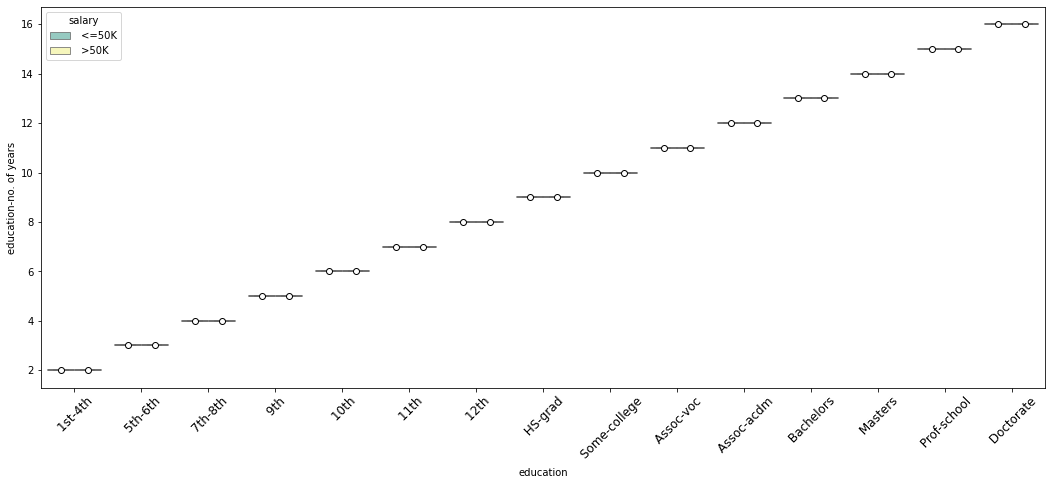

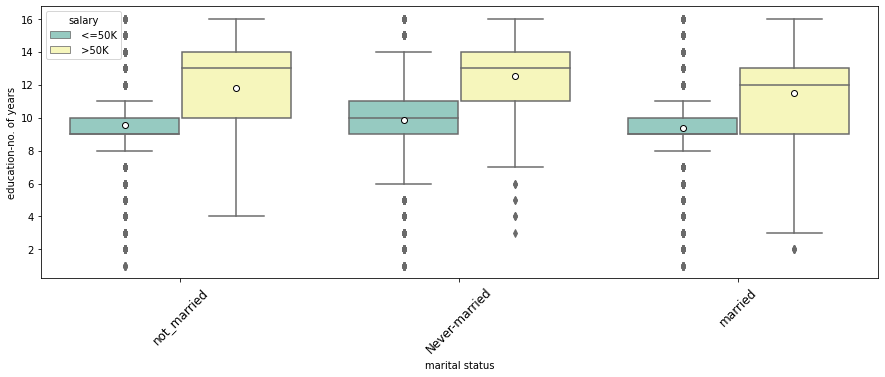

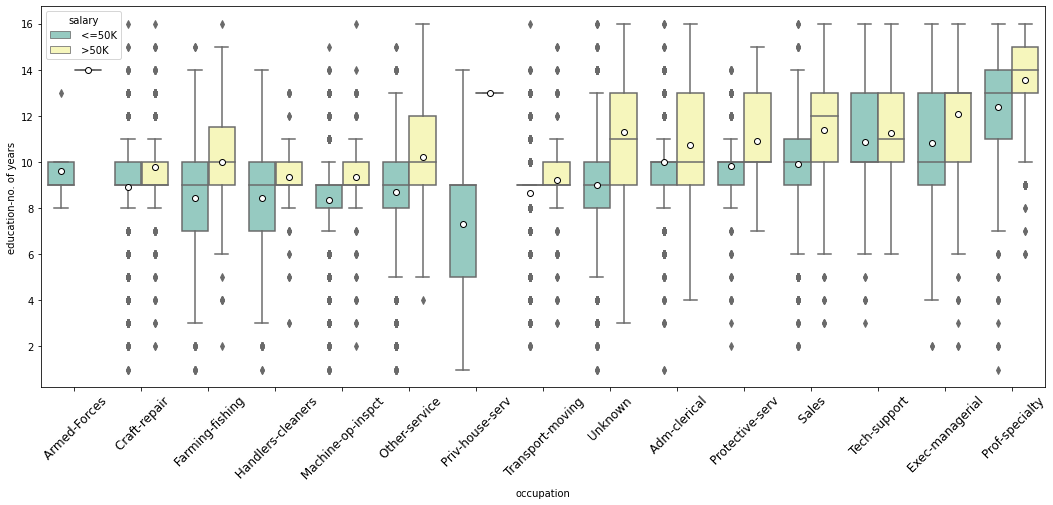

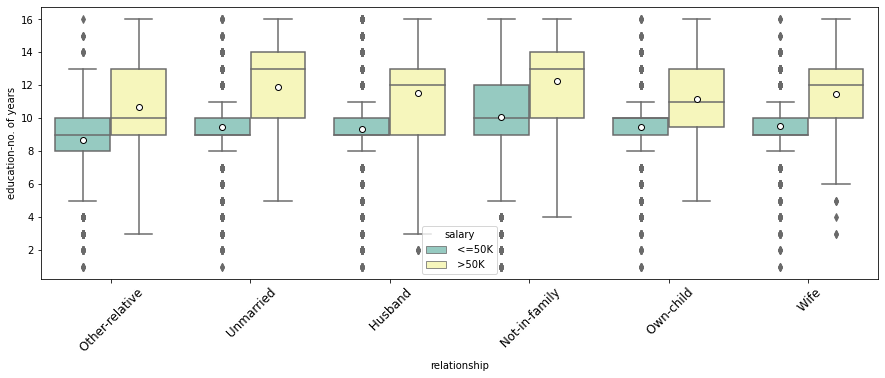

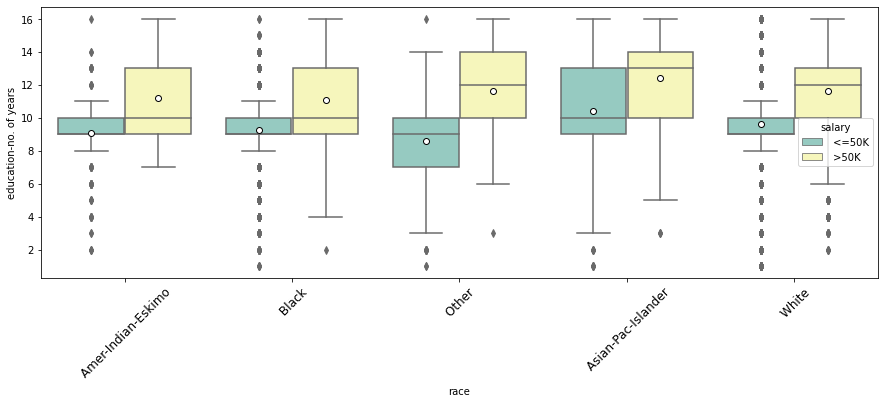

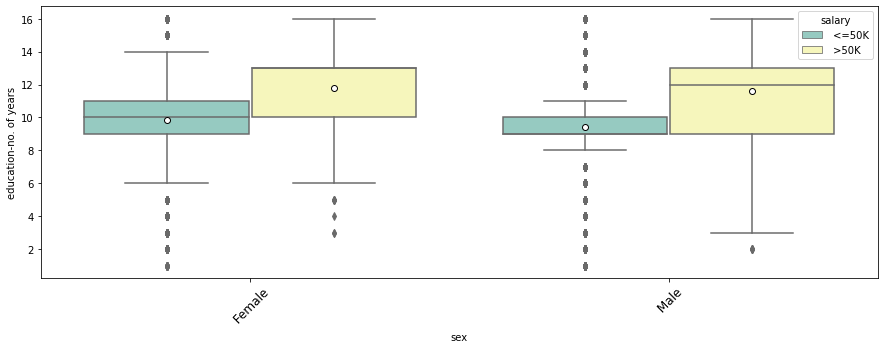

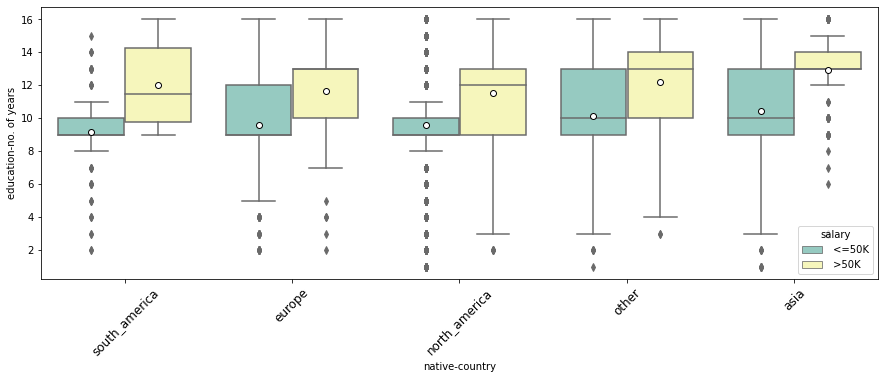

In [51]:
boxplt_hue(df,'education-no. of years')

* The median number of education years is greater for >50k salary compared to <=50k salary except for without pay as it does not have any data for >50k.
* The median for both >50k and <=50k is same for education type, but the median value increases as the standard of education increases.
* The median education years is higher or equal for >50k compared to <=50k for all categories of marital status, occupation, relationship, race and sex.
* For all the countries the median education years is greater for salary >50k compared to salary <=50k.

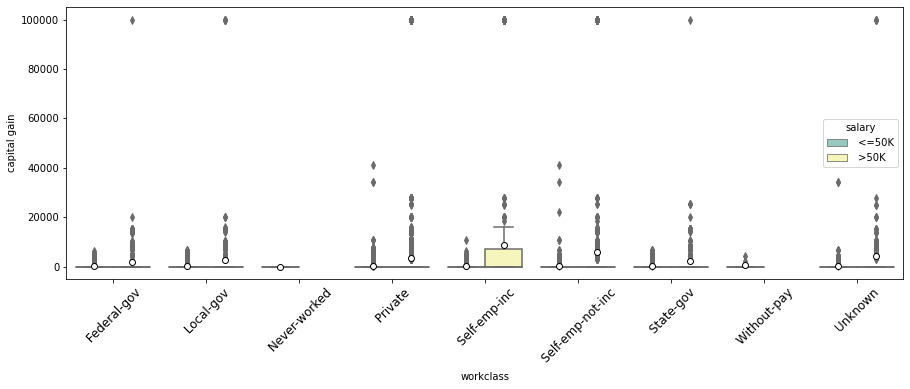

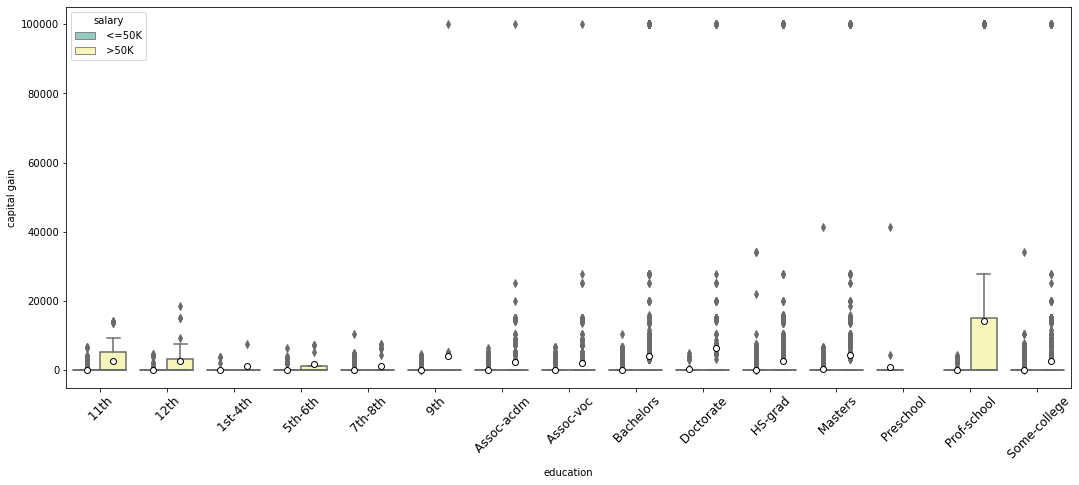

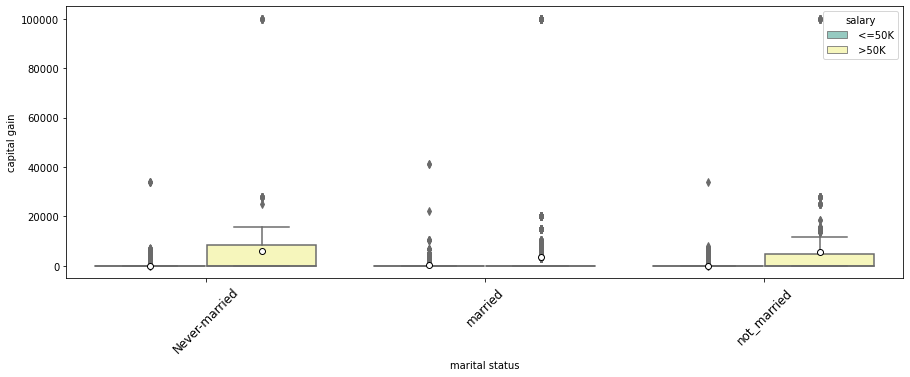

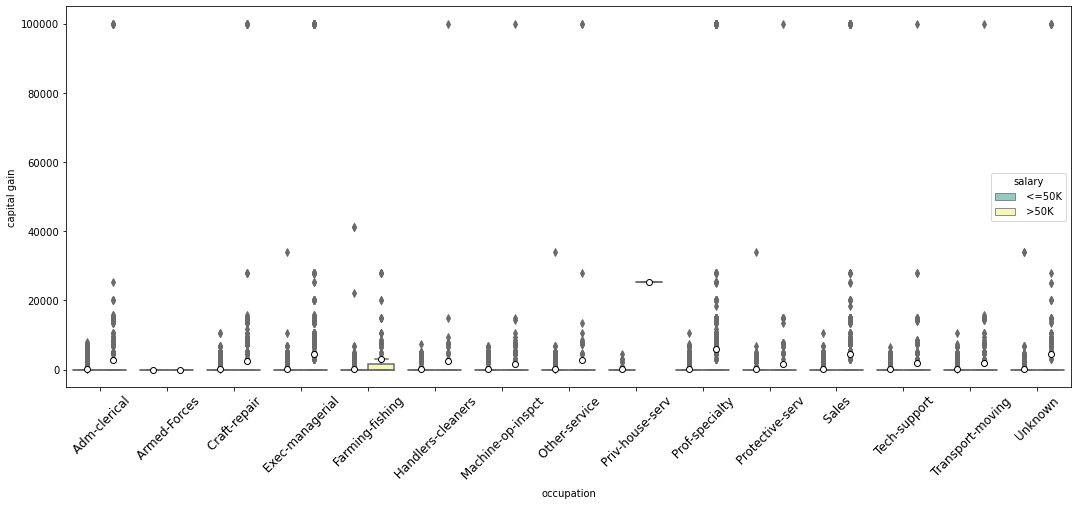

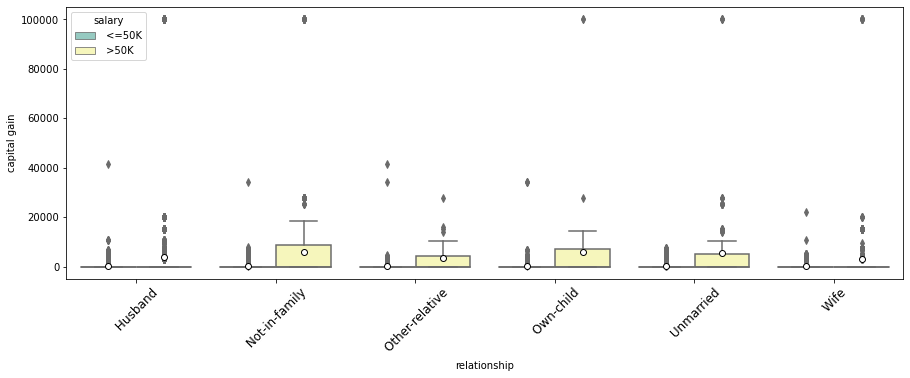

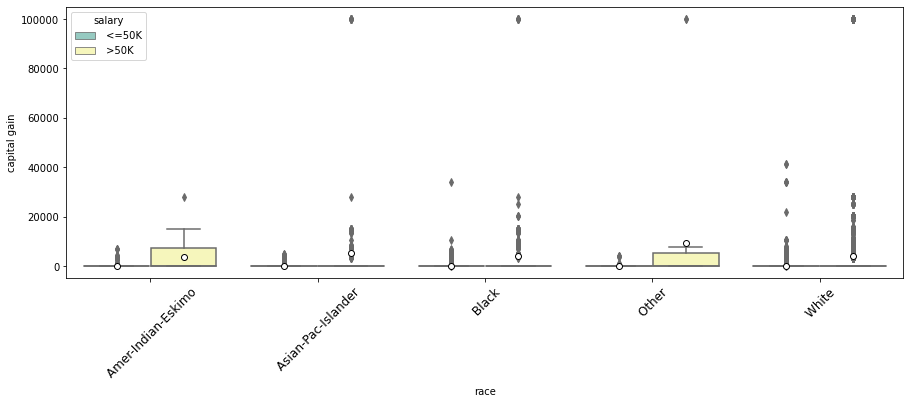

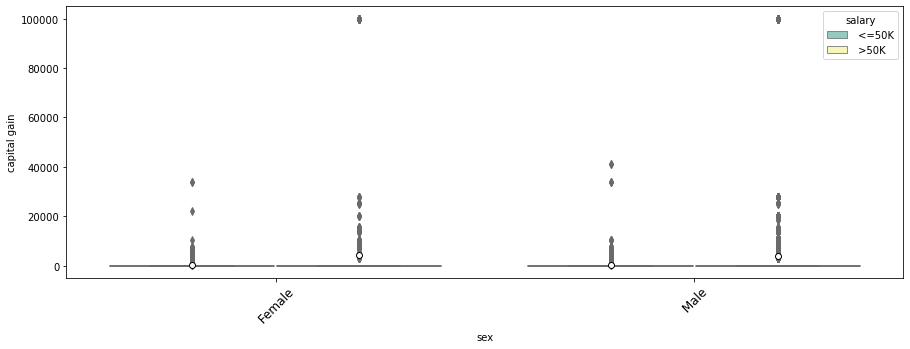

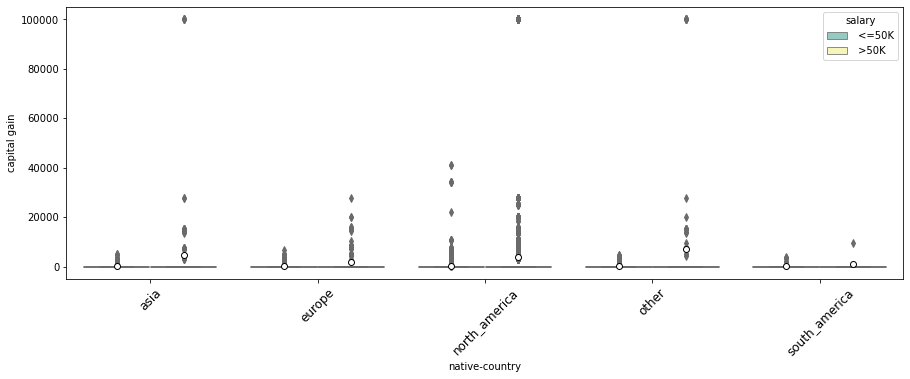

In [52]:
boxplt_hue(df,'capital gain')

* Except for Self-emp-inc workclass remaning types have atleast 75% of data at value 0.
* For all categories in education, marital status, relationship, race and sex all of them have the median at 0 and most of them have there Q3 at 0 as well but there are few whose Q3>0 with salary >50k.
* Priv-house-serv occupation has the median capital gain for >50k salary around 30000, but is 0 for <=50k. All the remaining occupation have their median value at 0 with Farming-fishing having Q3>0 with salary >50k.
* Most of the continents have their median value close to 0. Also, Q3 is close to 0 which indicates that 75% of the data is at 0. There are may outliers.

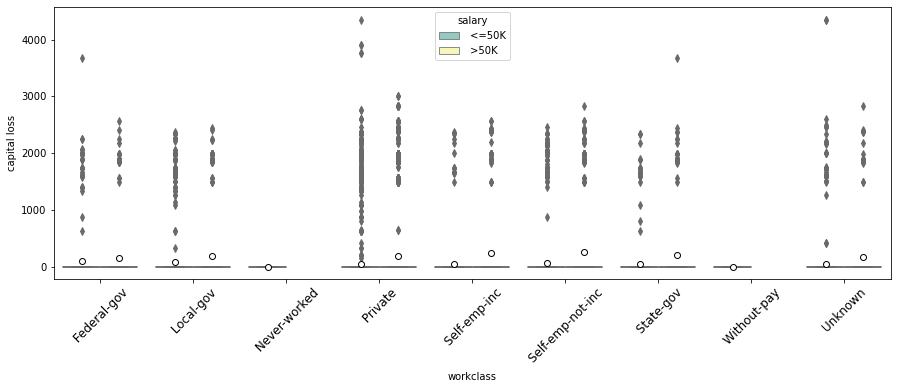

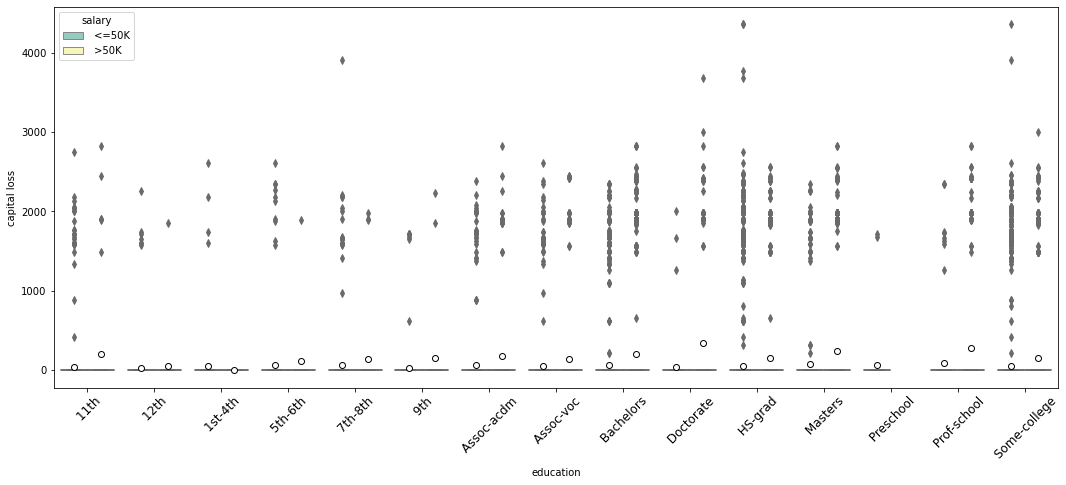

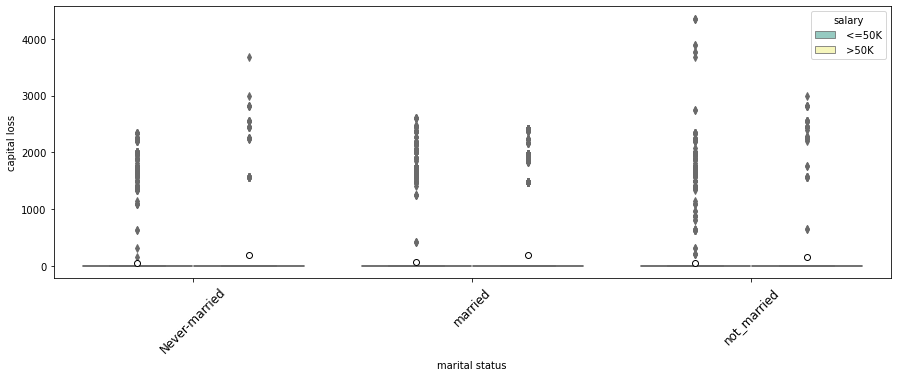

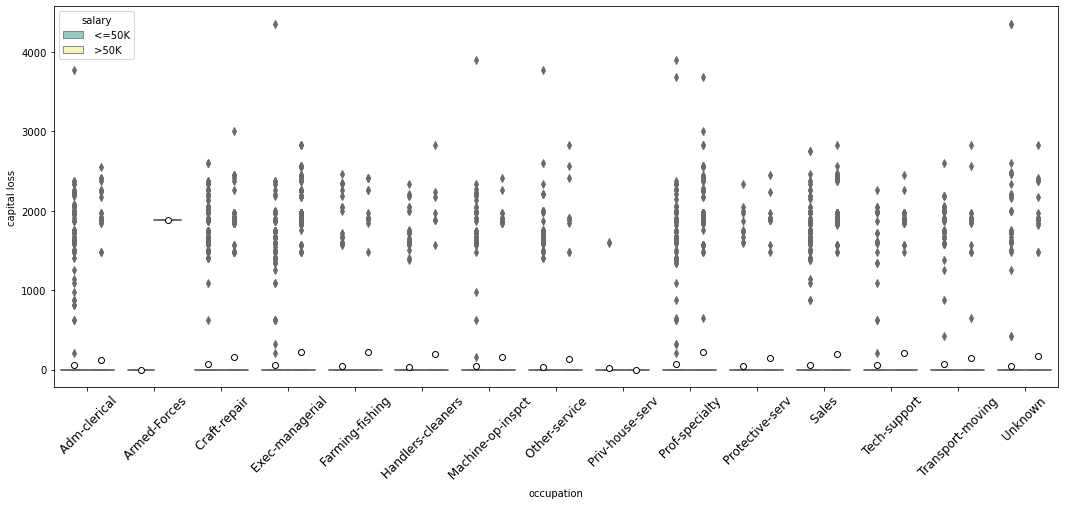

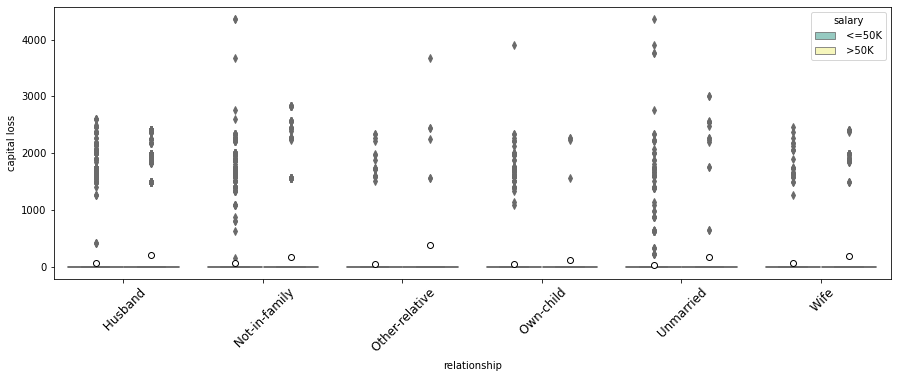

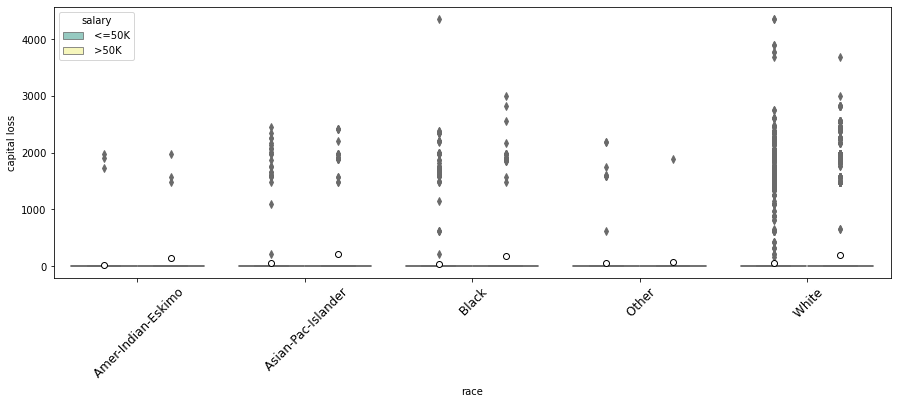

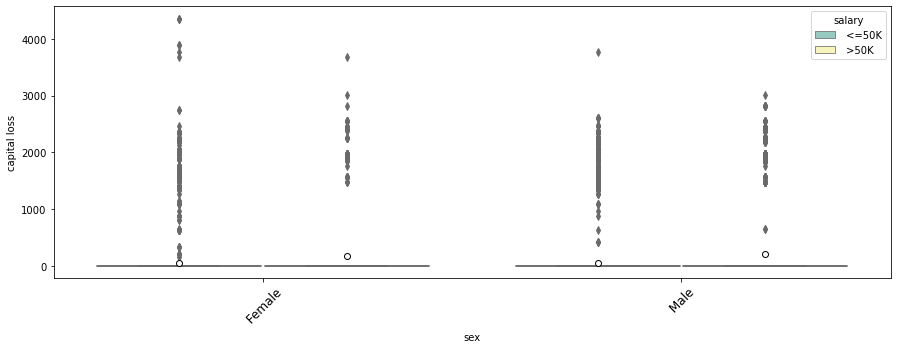

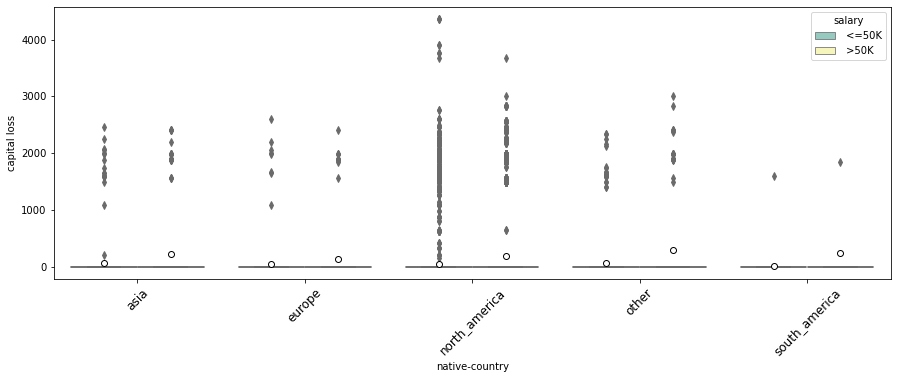

In [53]:
boxplt_hue(df,'capital loss')

* The median capital loss value for all categorical columns is 0.
* There are many outliers present in the data which will not be treated as they represent the real case scenario.
* For all the countries the Q3 is at 0.  

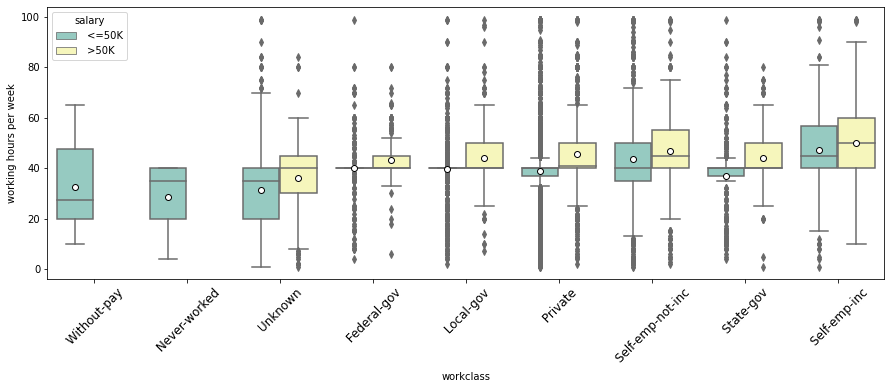

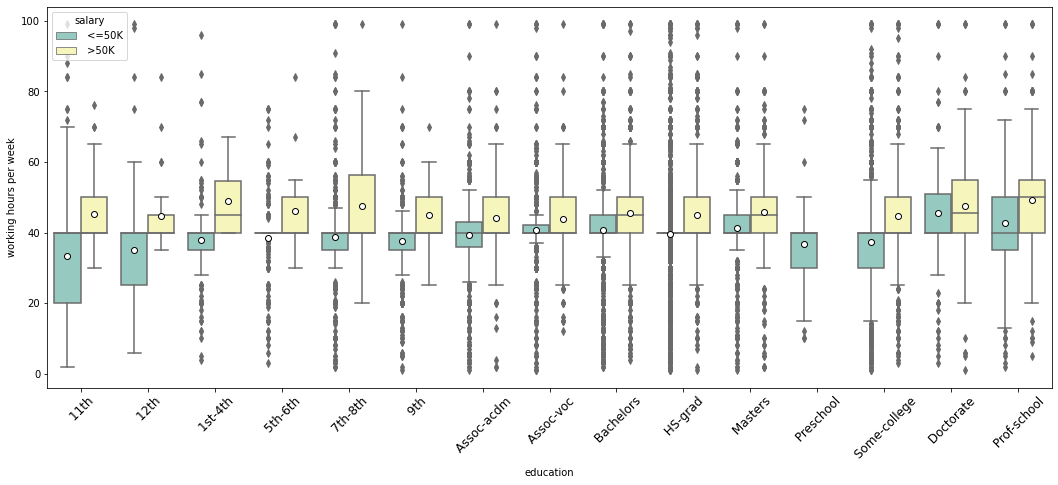

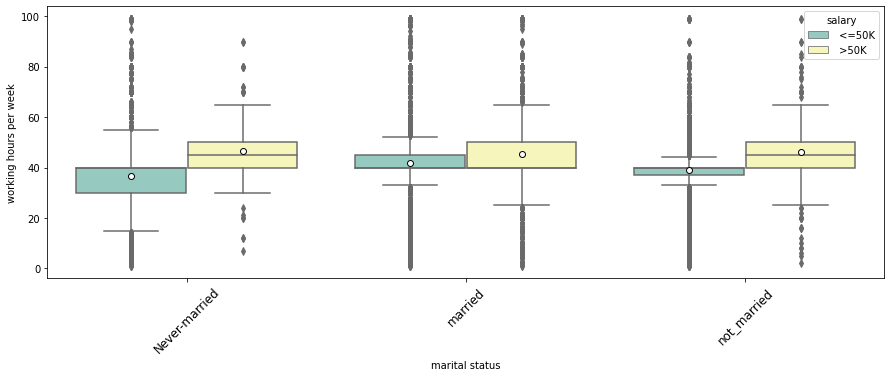

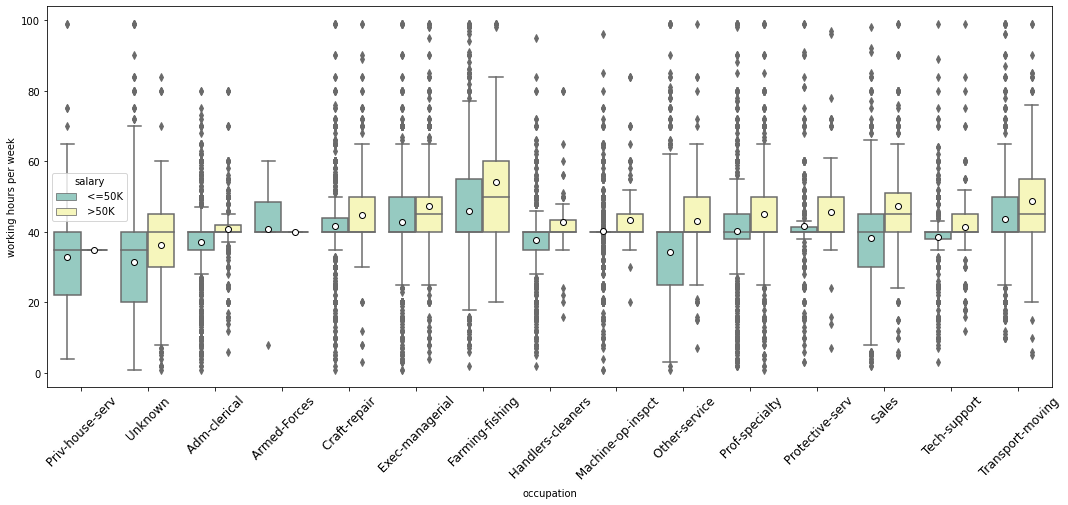

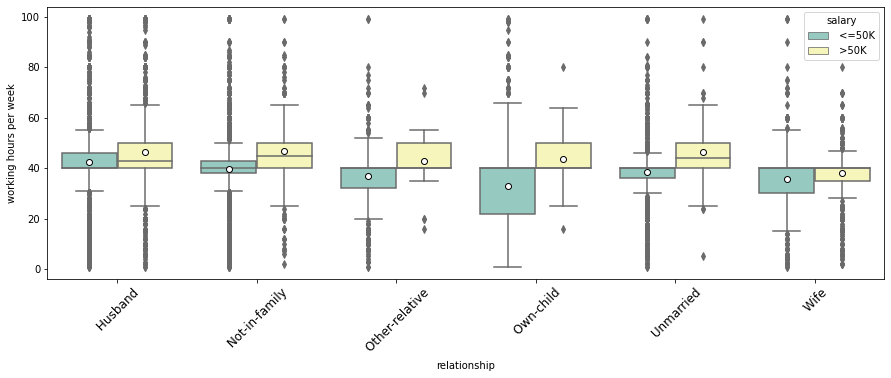

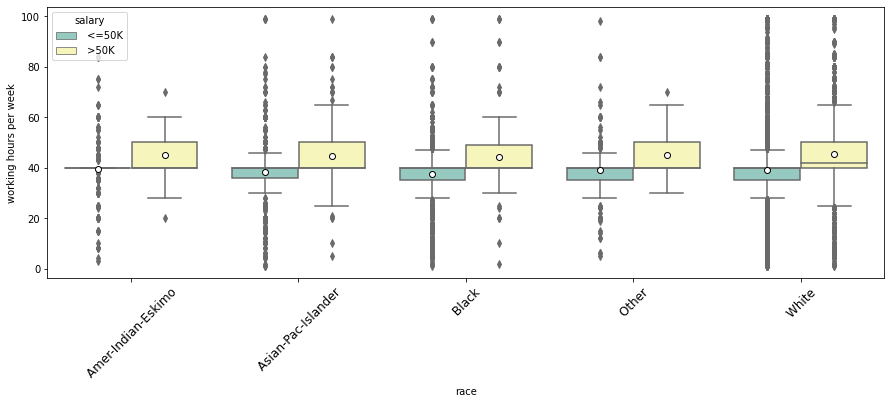

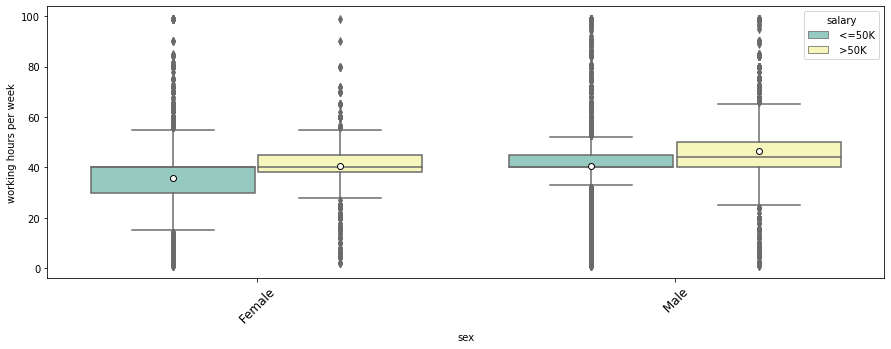

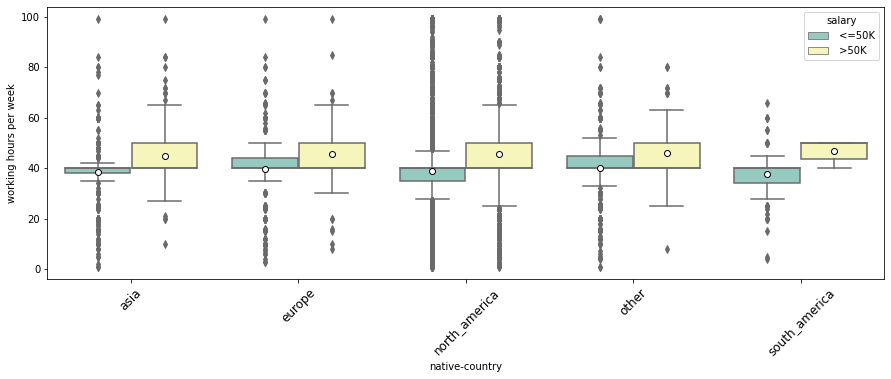

In [54]:
boxplt_hue(df,'working hours per week')

* For all columns except native-country the median value of working hours per week is greater or equal for >50k compared to <=50k salary.
* Guatemala has the median value less for >50k compared to <=50k.
* There are many outliers and will not be treated as they represent real case scenarios.

In [55]:
# Fuction to plot the ratio of each type in a categorical column present with respect to target variable

def stacked_barplt(data,feature,target):
    
    count=data[feature].nunique()
    sorter=data[target].value_counts().index[-1]
    tab1=pd.crosstab(data[feature],data[target],margins=True).sort_values(by=sorter,ascending=False)
    print(tab1)
    print('-'*50)
    tab=pd.crosstab(data[feature],data[target],normalize='index').sort_values(by=sorter,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=((count+1),5))
    plt.legend(loc='lower left',frameon=False)
    plt.legend(loc='upper left',bbox_to_anchor=(1,1))
    plt.show()

salary              <=50K   >50K    All
workclass                              
All                 24720   7841  32561
 Private            17733   4963  22696
 Self-emp-not-inc    1817    724   2541
 Self-emp-inc         494    622   1116
 Local-gov           1476    617   2093
 Federal-gov          589    371    960
 State-gov            945    353   1298
Unknown              1645    191   1836
 Never-worked           7      0      7
 Without-pay           14      0     14
--------------------------------------------------


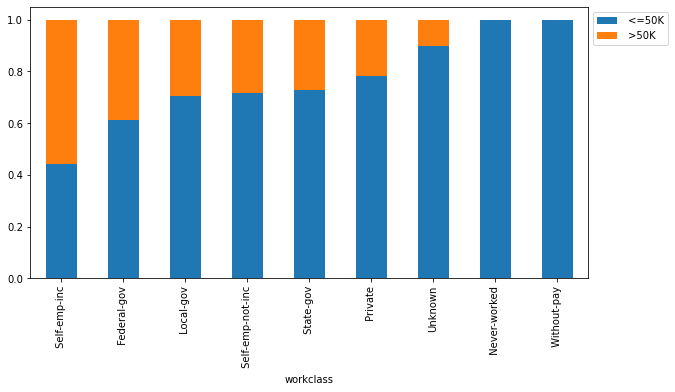

In [56]:
stacked_barplt(df,'workclass','salary')

 * Self-emp-inc has the highest percentage of with salary >50k compared to those <=50k
 * Remaining categories have around 40-25% of them with salary >50k
 * Without-pay does not have anyone with salary >50k.

salary          <=50K   >50K    All
education                          
All             24720   7841  32561
 Bachelors       3134   2221   5355
 HS-grad         8826   1675  10501
 Some-college    5904   1387   7291
 Masters          764    959   1723
 Prof-school      153    423    576
 Assoc-voc       1021    361   1382
 Doctorate        107    306    413
 Assoc-acdm       802    265   1067
 10th             871     62    933
 11th            1115     60   1175
 7th-8th          606     40    646
 12th             400     33    433
 9th              487     27    514
 5th-6th          317     16    333
 1st-4th          162      6    168
 Preschool         51      0     51
--------------------------------------------------


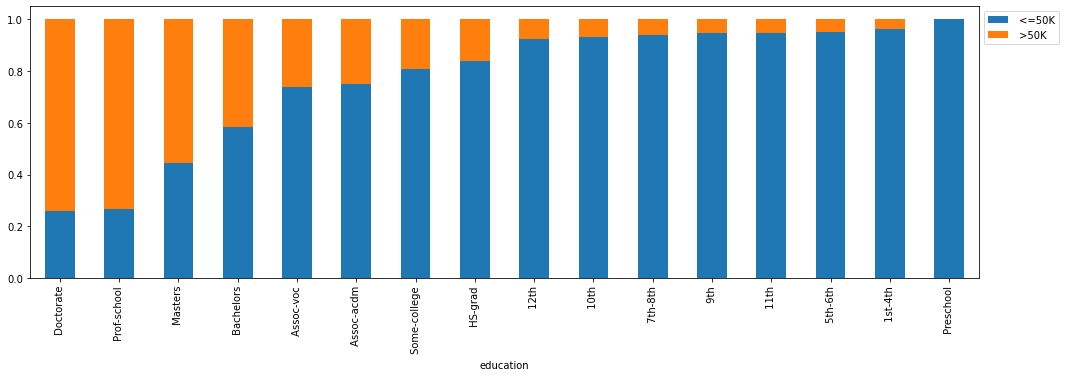

In [57]:
stacked_barplt(df,'education','salary')

* Prof-school and Doctorate have a very high percentage od people with salary >50k.
* Masters and Bachelors also have a good percent of people with salary >50k
* Remaining types above 12th grade have a notable percent of people with salary >50k.
* From 1st-4th to 12th very few people have salary >50k.
* There are no people with salary >50k for preschool.

salary           <=50K   >50K    All
marital status                      
All              24720   7841  32561
married           8297   6702  14999
not_married       6231    648   6879
Never-married    10192    491  10683
--------------------------------------------------


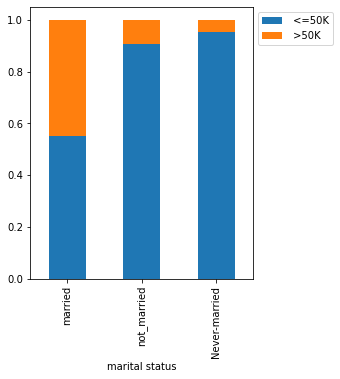

In [58]:
stacked_barplt(df,'marital status','salary')

* Married people has the highest percent of people with salary >50k
* Never married has the lowest percent of people with salary >50k

salary               <=50K   >50K    All
occupation                              
All                  24720   7841  32561
 Exec-managerial      2098   1968   4066
 Prof-specialty       2281   1859   4140
 Sales                2667    983   3650
 Craft-repair         3170    929   4099
 Adm-clerical         3263    507   3770
 Transport-moving     1277    320   1597
 Tech-support          645    283    928
 Machine-op-inspct    1752    250   2002
 Protective-serv       438    211    649
Unknown               1652    191   1843
 Other-service        3158    137   3295
 Farming-fishing       879    115    994
 Handlers-cleaners    1284     86   1370
 Armed-Forces            8      1      9
 Priv-house-serv       148      1    149
--------------------------------------------------


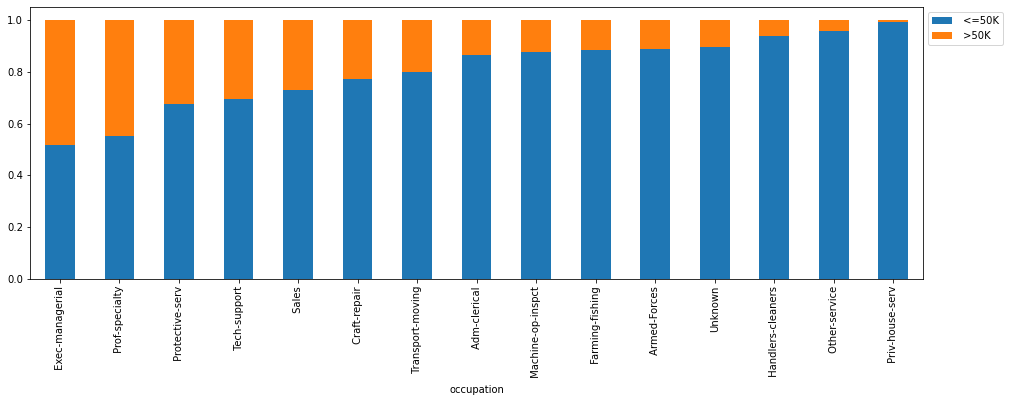

In [59]:
stacked_barplt(df,'occupation','salary')

* Exec-managerial and Prof-specialty have the highest amount of people with salary >50k
* Remaining types have notable number of people with salary >50k
* Priv-house-serv has the lowset amount of people with salary >50k

salary            <=50K   >50K    All
relationship                         
All               24720   7841  32561
 Husband           7275   5918  13193
 Not-in-family     7449    856   8305
 Wife               823    745   1568
 Unmarried         3228    218   3446
 Own-child         5001     67   5068
 Other-relative     944     37    981
--------------------------------------------------


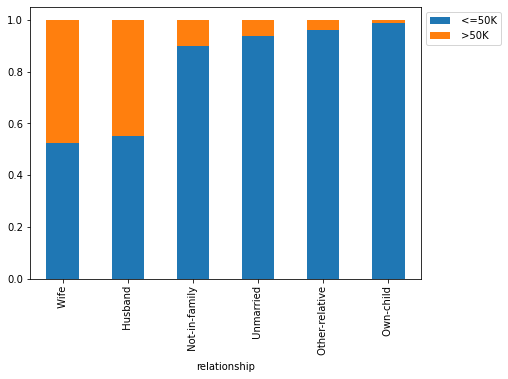

In [60]:
stacked_barplt(df,'relationship','salary')

* Wife and HUsband have a good number of people with salary >50k
* Remaining types have very few people with salary >50k

salary                <=50K   >50K    All
race                                     
All                   24720   7841  32561
 White                20699   7117  27816
 Black                 2737    387   3124
 Asian-Pac-Islander     763    276   1039
 Amer-Indian-Eskimo     275     36    311
 Other                  246     25    271
--------------------------------------------------


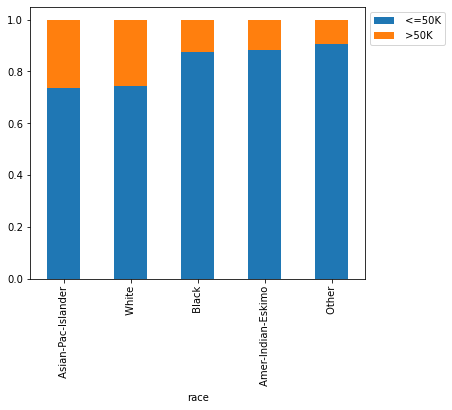

In [61]:
stacked_barplt(df,'race','salary')

* Asian-Pac-Islander and White have about 30% of people with salary >50k
* Remaining races have about 10% or less with salary >50k

salary    <=50K   >50K    All
sex                          
All       24720   7841  32561
 Male     15128   6662  21790
 Female    9592   1179  10771
--------------------------------------------------


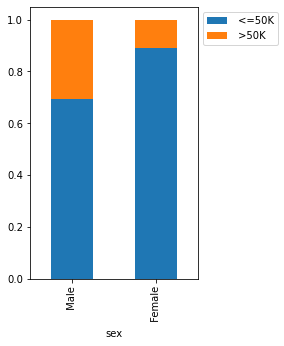

In [62]:
stacked_barplt(df,'sex','salary')

* Males have the highest number of people with salary >50k compared to females.

salary           <=50K   >50K    All
native-country                      
All              24720   7841  32561
north_america    23275   7313  30588
asia               465    206    671
other              501    162    663
europe             369    152    521
south_america      110      8    118
--------------------------------------------------


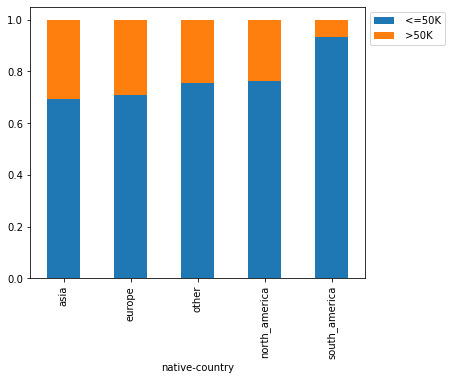

In [63]:
stacked_barplt(df,'native-country','salary')

* Asia has the highest percentage of people with salary >50K.
* Euprope has the second highest percentage
* South_america being the lowest percent of people with salary >50k

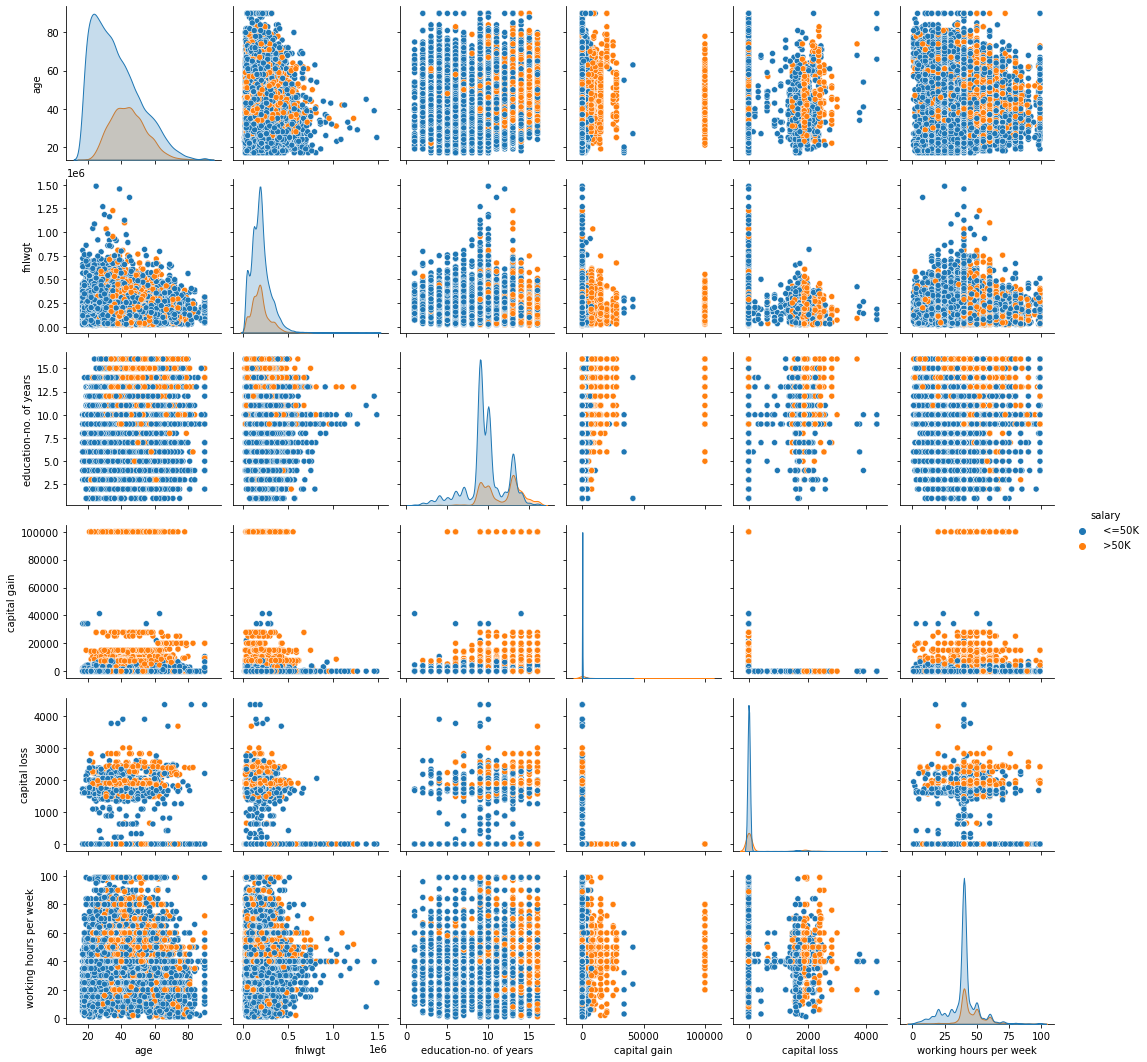

In [64]:
sns.pairplot(data=df,hue='salary')

* No particular relation can be identified from the pair plots above.

<AxesSubplot:>

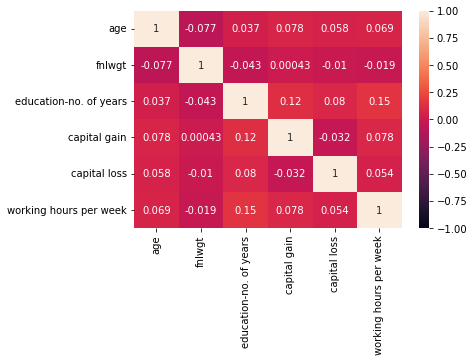

In [65]:
sns.heatmap(data=df.corr(),annot=True,vmin=-1,vmax=1)

* There is no significant correlation between the continous data cloumns present in the data.

### Handling Outliers

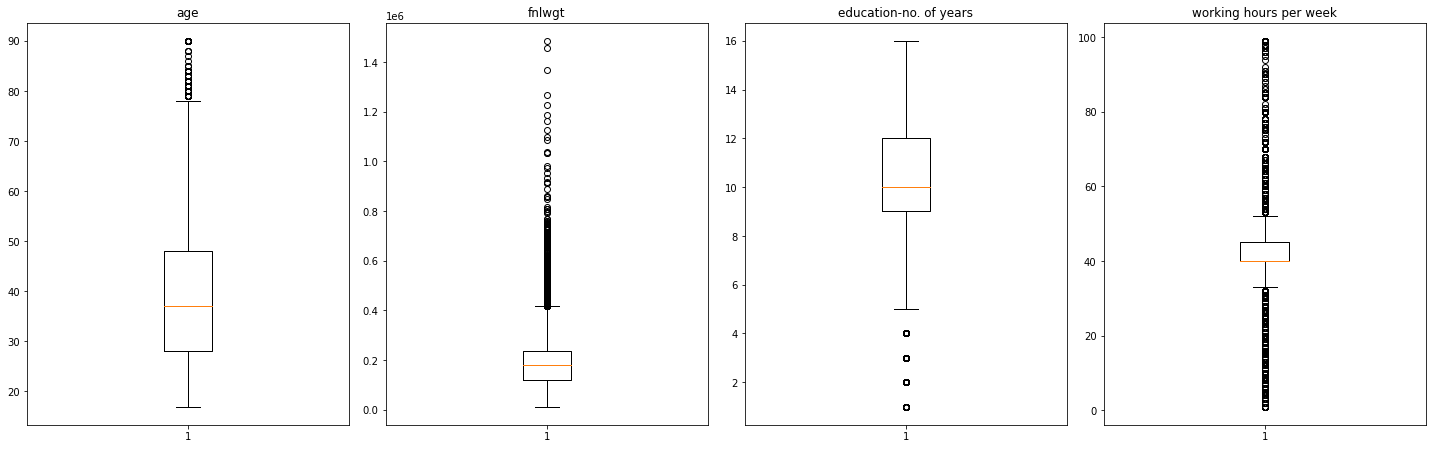

In [66]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
numerical_col=[e for e in numerical_col if e not in ('capital gain','capital loss')]
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Age and fnlwgt have outliers above the upper limit
* Education-no. of years have outliers below the lower limit
* working hours per week have outliers above the upper limit and below the lower limit

In [67]:
# function to treat outliers

def treat_outliers(data,col):
    
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    
    Lower_limit=Q1-1.5*IQR
    Upper_limit=Q3+1.5*IQR
    
    df[col]=np.clip(df[col],Lower_limit,Upper_limit)
    
    return df

In [68]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
numerical_col=[e for e in numerical_col if e not in ('capital gain','capital loss')]

for i in numerical_col:
    treat_outliers(df,i)

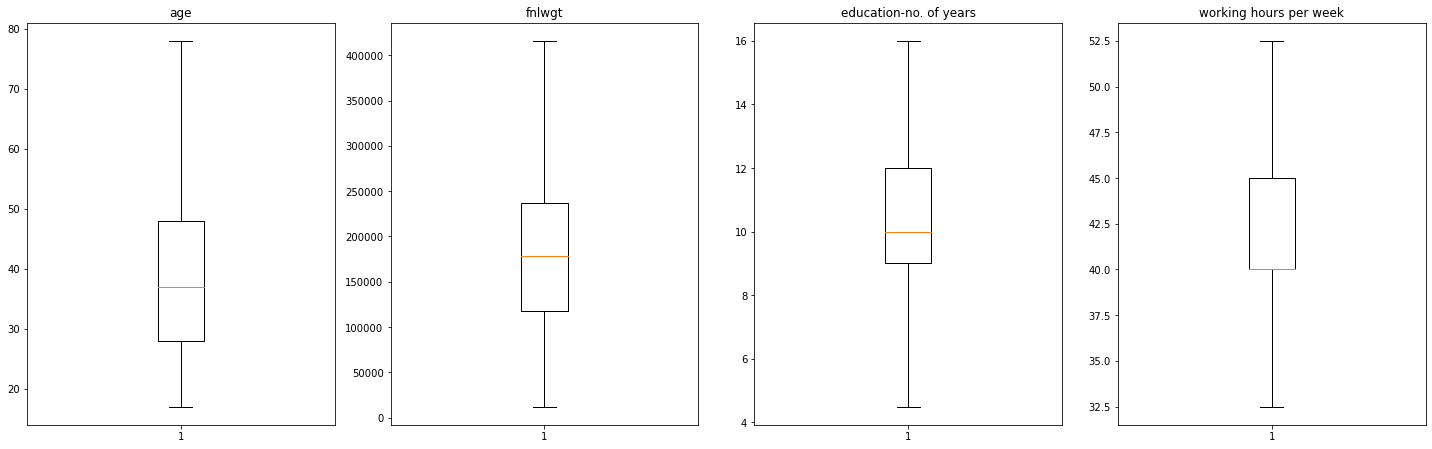

In [69]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
numerical_col=[e for e in numerical_col if e not in ('capital gain','capital loss')]
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All the outliers are treated for the continous variable columns
* The values lower than lower limit are made equal to lower limit
* The values higher than upper limit are made equal to the upper limit

###  Data Preparation

* In the capital gain and capital loss column there are many 0 and it has many outliers with values being very large compared to the 0. 
* Also 75% of the data is at 0 for capital gain and capital loss
* So its better to drop these columns, as the outliers cannot be properly treated.

In [70]:
# changing salary to 0 and 1

df['salary']=df['salary'].apply(lambda x: 1 if x==' <=50K' else 0)

In [71]:
X=df.drop(['capital gain','capital loss','salary'],axis=1)
y=df['salary']

In [72]:
X=pd.get_dummies(data=X,drop_first=True)

In [73]:
X.head()

age    fnlwgt  education-no. of years  working hours per week  \
0  39.0   77516.0                    13.0                    40.0   
1  50.0   83311.0                    13.0                    32.5   
2  38.0  215646.0                     9.0                    40.0   
3  53.0  234721.0                     7.0                    40.0   
4  28.0  338409.0                    13.0                    40.0   

   workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
0                     0                        0                   0   
1                     0                        0                   0   
2                     0                        0                   1   
3                     0                        0                   1   
4                     0                        0                   1   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  workclass_ State-gov  \
0                        0                            0                     1   
1                        0                            1                     0   
2                        0                            0                     0   
3                        0                            0                     0   
4                        0                            0                     0   

   workclass_ Without-pay  workclass_Unknown  education_ 11th  \
0                       0                  0                0   
1                       0                  0                0   
2                       0                  0                0   
3                       0                  0                1   
4                       0                  0                0   

   education_ 12th  education_ 1st-4th  education_ 5th-6th  \
0                0                   0                   0   
1                0                   0                   0   
2                0                   0                   0   
3                0                   0                   0   
4                0                   0                   0   

   education_ 7th-8th  education_ 9th  education_ Assoc-acdm  \
0                   0               0                      0   
1                   0               0                      0   
2                   0               0                      0   
3                   0               0                      0   
4                   0               0                      0   

   education_ Assoc-voc  education_ Bachelors  education_ Doctorate  \
0                     0                     1                     0   
1                     0                     1                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     1                     0   

   education_ HS-grad  education_ Masters  education_ Preschool  \
0                   0                   0                     0   
1                   0                   0                     0   
2                   1                   0                     0   
3                   0                   0                     0   
4                   0                   0                     0   

   education_ Prof-school  education_ Some-college  marital status_married  \
0                       0                        0                       0   
1                       0                        0                       1   
2                       0                        0                       0   
3                       0                        0                       1   
4                       0                        0                       1   

   marital status_not_married  occupation_ Armed-Forces  \
0                           0                         0   
1                           0                         0   
2                           1               

In [74]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: salary, dtype: int64

In [75]:
y.value_counts()

1    24720
0     7841
Name: salary, dtype: int64

### Splitting data into train and test

In [76]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=1)

### Model Building

In [77]:
# Function for the evaluation of model performance based on different metrics

def model_performance(model,features,target,threshold=0.5):
    
    prob=model.predict_proba(features)[:,1]
    pred=np.round(prob>threshold)
    
    acc=accuracy_score(target,pred)
    recall=recall_score(target,pred)
    precision=precision_score(target,pred)
    f1=f1_score(target,pred)
    
    df_score = pd.DataFrame({'accuracy':acc,'recall':recall,'precision':precision,'f1_score':f1},index=[0])
    
    return df_score

In [78]:
# Function for plotting the confusion matrix

def confusion_mat(model,features,target,threshold=0.5):
    
    prob=model.predict_proba(features)[:,1]
    pred=np.round(prob>threshold)
    
    cm = confusion_matrix(target, pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [79]:
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(x_train, y_train)

#### Coefficients

In [80]:
pd.DataFrame(np.append(model.coef_[0],model.intercept_),index=x_train.columns.tolist() + ["Intercept"],columns=['coef']).T

age        fnlwgt  education-no. of years  working hours per week  \
coef -0.02941 -8.486639e-07               -0.282911               -0.067666   

      workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
coef               0.63182                 0.217006            0.427348   

      workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  \
coef                 0.091672                     0.897962   

      workclass_ State-gov  workclass_ Without-pay  workclass_Unknown  \
coef              0.637046                1.024709           0.458894   

      education_ 11th  education_ 12th  education_ 1st-4th  \
coef         0.174617         0.022958            0.253884   

      education_ 5th-6th  education_ 7th-8th  education_ 9th  \
coef            0.016296            0.096079        0.176259   

      education_ Assoc-acdm  education_ Assoc-voc  education_ Bachelors  \
coef               0.314842             -0.040979             -0.064715   

      education_ Doctorate  education_ HS-grad  education_ Masters  \
coef             -0.126377           -0.048441            -0.17073   

      education_ Preschool  education_ Prof-school  education_ Some-college  \
coef              0.698271               -0.527154                -0.105511   

      marital status_married  marital status_not_married  \
coef               -2.148023                   -0.418034   

      occupation_ Armed-Forces  occupation_ Craft-repair  \
coef                  0.286703                 -0.165774   

      occupation_ Exec-managerial  occupation_ Farming-fishing  \
coef                    -0.793834                     0.872296   

      occupation_ Handlers-cleaners  occupation_ Machine-op-inspct  \
coef                       0.624314                       0.250878   

      occupation_ Other-service  occupation_ Priv-house-serv  \
coef                   0.917335                     1.099985   

      occupation_ Prof-specialty  occupation_ Protective-serv  \
coef                   -0.505288                    -0.544127   

      occupation_ Sales  occupation_ Tech-support  \
coef          -0.253684                 -0.603723   

      occupation_ Transport-moving  occupation_Unknown  \
coef                      0.106843            0.675901   

      relationship_ Not-in-family  relationship_ Other-relative  \
coef                    -0.164815                      0.521912   

      relationship_ Own-child  relationship_ Unmarried  relationship_ Wife  \
coef                 0.926431                 0.026678           -1.388427   

      race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
coef                 -0.368523    -0.242593     0.028692    -0.352611   

      sex_ Male  native-country_europe  native-country_north_america  \
coef  -0.762074              -0.371546                     -0.222745   

      native-country_other  native-country_south_america  Intercept  
coef              0.135536                      1.296748  10.736542

* Coefficients of age, fnnlwgt, education-no. of years, working hours per week, few education types, occupations, relationships, race, native-country, sex_male and marital status are negative so an increase in these will decrease the chance of salary being <=50K.
* Coefficients of all workclass,few education types, occupations, relationships, race, native-country are positive so an increase in these will increase the chance of salary being <=50K. 
* All the coefficients are log(odds)

#### Converting coefficients to odds

In [81]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train.columns).T

age    fnlwgt  education-no. of years  \
Odds         0.971018  0.999999                0.753587   
Change_odd% -2.898168 -0.000085              -24.641348   

             working hours per week  workclass_ Local-gov  \
Odds                       0.934573              1.881031   
Change_odd%               -6.542704             88.103108   

             workclass_ Never-worked  workclass_ Private  \
Odds                        1.242352            1.533187   
Change_odd%                24.235193           53.318679   

             workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  \
Odds                        1.096005                     2.454597   
Change_odd%                 9.600541                   145.459656   

             workclass_ State-gov  workclass_ Without-pay  workclass_Unknown  \
Odds                     1.890887                2.786284           1.582324   
Change_odd%             89.088707              178.628353          58.232372   

             education_ 11th  education_ 12th  education_ 1st-4th  \
Odds                1.190790         1.023223            1.289023   
Change_odd%        19.078954         2.322321           28.902259   

             education_ 5th-6th  education_ 7th-8th  education_ 9th  \
Odds                   1.016430            1.100846        1.192747   
Change_odd%            1.642952           10.084643       19.274669   

             education_ Assoc-acdm  education_ Assoc-voc  \
Odds                      1.370042              0.959849   
Change_odd%              37.004223             -4.015099   

             education_ Bachelors  education_ Doctorate  education_ HS-grad  \
Odds                     0.937334              0.881283            0.952714   
Change_odd%             -6.266572            -11.871730           -4.728609   

             education_ Masters  education_ Preschool  education_ Prof-school  \
Odds                   0.843049              2.010274                0.590283   
Change_odd%          -15.695108            101.027384              -40.971723   

             education_ Some-college  marital status_married  \
Odds                        0.899864                0.116715   
Change_odd%               -10.013583              -88.328530   

             marital status_not_married  occupation_ Armed-Forces  \
Odds                           0.658340                  1.332028   
Change_odd%                  -34.165987                 33.202812   

             occupation_ Craft-repair  occupation_ Exec-managerial  \
Odds                         0.847238                     0.452108   
Change_odd%                -15.276217                   -54.789184   

             occupation_ Farming-fishing  occupation_ Handlers-cleaners  \
Odds                            2.392398                       1.866964   
Change_odd%                   139.239832                      86.696448   

             occupation_ Machine-op-inspct  occupation_ Other-service  \
Odds                              1.285153                   2.502611   
Change_odd%                      28.515315                 150.261107   

             occupation_ Priv-house-serv  occupation_ Prof-specialty  \
Odds                            3.004120                    0.603332   
Change_odd%                   200.411993                  -39.666840   

             occupation_ Protective-serv  occupation_ Sales  \
Odds                            0.580348           0.775937   
Change_odd%                   -41.965201         -22.406329   

             occupation_ Tech-support  occupation_ Transport-moving  \
Odds                         0.546772                      1.112760   
Change_odd%                -45.322754                     11.275967   

             occupation_Unknown  relationship_ Not-in-family  \
Odds                   1.965803                     0.848050   
Change_odd%           96.580293                   -15.194969   

             relationship_ Other-relative  relationship_ Own-child  \

* Age: Holding all other units constant changing age by 1 unit decreases the odds of a person having salary <=50k by 0.97 times or decreases the odds by 2.89%.
* Education years: Holding all other units constant changing education years by 1 unit decreases the odds of a person having salary <=50k by 0.93 times or decreases the odds by 24.64%.
* Similar interpretation can be done for other attributes.

### Model performance

In [82]:
# Training data
Log_mod_tra=model_performance(model,x_train,y_train)
Log_mod_tra

accuracy    recall  precision  f1_score
0  0.834372  0.921142   0.867248  0.893383

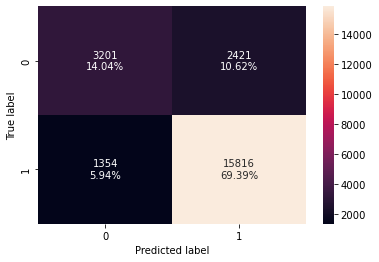

In [83]:
# Training data
confusion_mat(model,x_train,y_train)

In [84]:
# Testing data
Log_mod_test=model_performance(model,x_test,y_test)
Log_mod_test

accuracy    recall  precision  f1_score
0  0.838673  0.917483   0.879061  0.897861

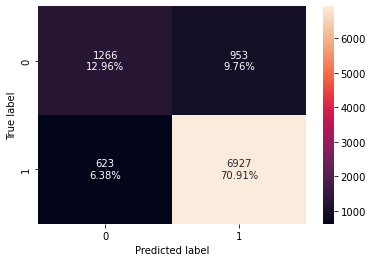

In [85]:
# Testing data
confusion_mat(model,x_test,y_test)

#### ROC-AUC curve

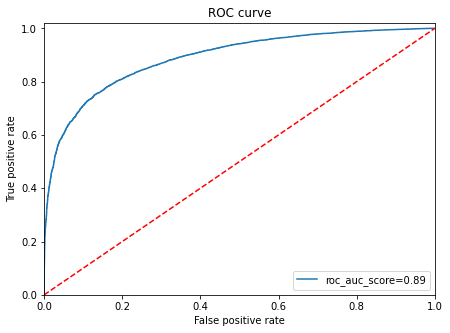

In [86]:
# Training data

rsco=roc_auc_score(y_train,lg.predict_proba(x_train)[:,1])
fpr,tpr,thres=roc_curve(y_train,lg.predict_proba(x_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,label='roc_auc_score=%0.2f'%rsco)
plt.plot([0,1],[0,1],'r--')
plt.xlim(0,1)
plt.ylim(0,1.02)
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

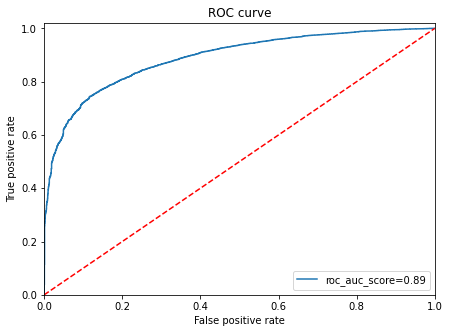

In [87]:
# Testing data

rscot=roc_auc_score(y_test,lg.predict_proba(x_test)[:,1])
fprt,tprt,threst=roc_curve(y_test,lg.predict_proba(x_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fprt,tprt,label='roc_auc_score=%0.2f'%rscot)
plt.plot([0,1],[0,1],'r--')
plt.xlim(0,1)
plt.ylim(0,1.02)
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

* Model performace is similar for both training and testing data
* Further imporvement on the threshold can be done to improve the scores.

#### Finding the optimal threshold using ROC curve

In [88]:
fpr,tpr,threshold = roc_curve(y_train,lg.predict_proba(x_train)[:,1])

opt_ind=np.argmax(tpr-fpr)
opt_tres=threshold[opt_ind]
print('Optimal threshold: ',opt_tres)

Optimal threshold:  0.7762446674491441


In [89]:
# Training data
Log_mod_roc_tra=model_performance(model,x_train,y_train,0.7762)
Log_mod_roc_tra

accuracy    recall  precision  f1_score
0  0.780186  0.750379   0.946796  0.837221

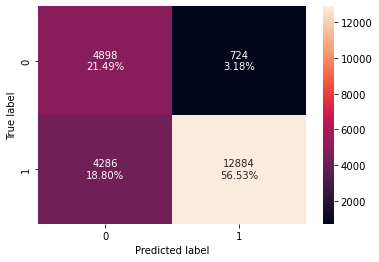

In [90]:
# Training data
confusion_mat(model,x_train,y_train,0.7762)

In [91]:
# Testing data
Log_mod_roc_test=model_performance(model,x_test,y_test,0.7762)
Log_mod_roc_test

accuracy    recall  precision  f1_score
0  0.779609  0.752185   0.952693  0.840648

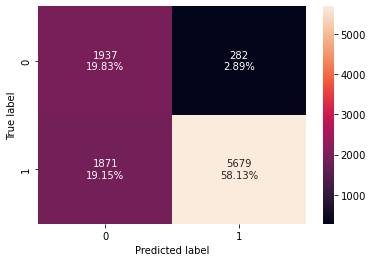

In [92]:
# Testing data
confusion_mat(model,x_test,y_test,0.7762)

* With the new threshold even though the precision increased recall and f1 score are decreased by a lot. 
* So a better balance between the precision and recall must be found by using a different threshold.

#### Using Precision recall curve to find a better threshold

In [93]:
# Function for plotting the precision recall curve

def pre_re_curve(precision, recall, threshold):
    plt.figure(figsize=(12,5))
    plt.plot(threshold,precision[:-1],'b--',label='Precision')
    plt.plot(threshold,recall[:-1],'g--',label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center right')
    plt.grid(which='major')
    plt.ylim(0,1.05)
    plt.xticks(np.linspace(0,1,21))
    plt.show()

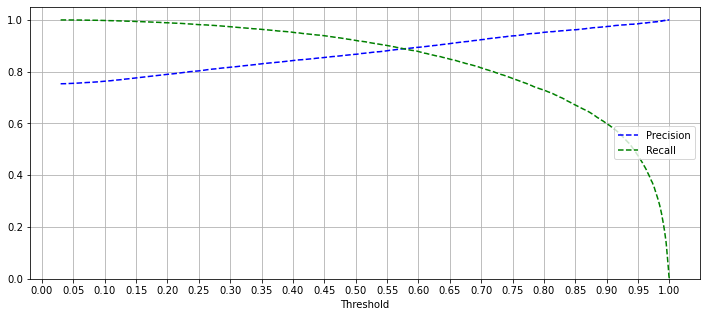

In [94]:
y_prob=lg.predict_proba(x_train)[:,1]
pre,re,thres=precision_recall_curve(y_train,y_prob)
pre_re_curve(pre,re,thres)

* At threshold of 0.575 we can have a better balance between the precision and recall scores

In [95]:
# Training data
Log_mod_pr_tra=model_performance(model,x_train,y_train,0.575)
Log_mod_pr_tra

accuracy  recall  precision  f1_score
0  0.832353  0.8894    0.88821  0.888805

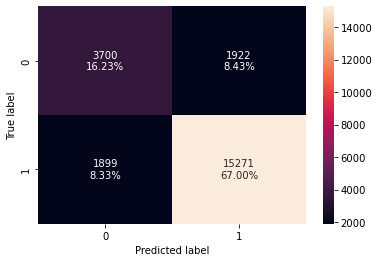

In [96]:
# Training data
confusion_mat(model,x_train,y_train,0.575)

In [97]:
# Testing data
Log_mod_pr_test=model_performance(model,x_test,y_test,0.575)
Log_mod_pr_test

accuracy    recall  precision  f1_score
0  0.832224  0.883046   0.898154  0.890536

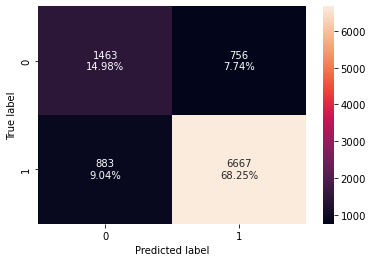

In [98]:
# Testing data
confusion_mat(model,x_test,y_test,0.575)

###  Model Performance comparision

In [99]:
train_model=pd.concat(
[
    Log_mod_tra.T,
    Log_mod_roc_tra.T,
    Log_mod_pr_tra.T
], axis=1)

train_model.columns=['Logistic Regression','Logistic Regression Threshold=0.7762','Logistic Regression Threshold=0.575']
train_model

Logistic Regression  Logistic Regression Threshold=0.7762  \
accuracy              0.834372                              0.780186   
recall                0.921142                              0.750379   
precision             0.867248                              0.946796   
f1_score              0.893383                              0.837221   

           Logistic Regression Threshold=0.575  
accuracy                              0.832353  
recall                                0.889400  
precision                             0.888210  
f1_score                              0.888805

In [100]:
test_model=pd.concat(
[
    Log_mod_test.T,
    Log_mod_roc_test.T,
    Log_mod_pr_test.T
], axis=1)

test_model.columns=['Logistic Regression','Logistic Regression Threshold=0.7762','Logistic Regression Threshold=0.575']
test_model

Logistic Regression  Logistic Regression Threshold=0.7762  \
accuracy              0.838673                              0.779609   
recall                0.917483                              0.752185   
precision             0.879061                              0.952693   
f1_score              0.897861                              0.840648   

           Logistic Regression Threshold=0.575  
accuracy                              0.832224  
recall                                0.883046  
precision                             0.898154  
f1_score                              0.890536

* Depending on the importance and cost for False Negatives or True Positive the optimal threshold can be decided imporve the precision or recall.

###  Conclusion

* Model built using logistic regression was able to provide a ROC-AUC score of 0.89 for both train & test data and an F1-score of 0.88 on train data & 0.89 on test data.
* In the model coefficients of age, fnnlwgt, education-no. of years, working hours per week, few education types, occupations, relationships, race, native-country, sex_male and marital status are negative so an increase in these will decrease the chance of salary being <=50K.
* In the model coefficients of all workclass,few education types, occupations, relationships, race, native-country are positive so an increase in these will increase the chance of salary being <=50K

### Recommendations

* We have seen that people with higher education have higher chance of getting salary >50k, so a good promotion of education can imporve the salary of people.
* Even with working hours as same as those with salary >50k many people are not getting proper salary. So proper evaluation of the working hours the salary paid must be done to ensure that people are getting paid properly.
* Even thought we have dropped the capital gain column, we can see that people with good capital gain have a good chance of being in salary >50k. So an increase in the awarness in investments might help people to imporve their earnings.
* The Asian-Pac-Islander and Whites have more percentage of people with salary >50k, so it must be ensured that the people are getting paid more or less without being dependent on race.
* There is higher chance for male to get a salary >50k compared to females, so it must be made sure that females are being properly paid inaccordance with their contribution.